# DECISION TREE

## Objective:


#### The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

### Tasks:

#### 1. Data Preparation:


#### Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical operations
import numpy as np

# Import the matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Import the seaborn library for statistical data visualization
import seaborn as sns

In [2]:
# Read the Excel file "heart_disease.xlsx" and load the sheet named "Heart_disease" into a DataFrame
heart_diseases = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")

# Display the first few rows of the DataFrame to check the data
heart_diseases.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

### 2. Exploratory Data Analysis (EDA):

#### Perform exploratory data analysis to understand the structure of the dataset..


#### Check for missing values, outliers, and inconsistencies in the data.

#### Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [3]:
# Call the shape attribute of the heart_diseases DataFrame to get its dimensions
heart_diseases.shape

(908, 13)

In [4]:
# Set pandas option to display all rows in the DataFrame without truncation
pd.set_option('display.max_rows', None)

# Set pandas option to display all columns in the DataFrame without truncation
pd.set_option('display.max_columns', None)

# Set pandas option to display full content in each column without truncation
pd.set_option('display.max_colwidth', None)

# Loop through each column in the heart_diseases DataFrame
for col in heart_diseases.columns:
    # Print the name of the current column
    print(col)
    
    # Print the count of unique values for the current column
    print(heart_diseases[col].value_counts())

age
54    51
58    43
55    41
57    38
56    38
52    36
59    35
51    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    22
65    21
44    19
47    19
42    18
45    18
38    16
39    15
67    15
66    13
40    13
69    13
37    11
68    10
35     9
70     7
74     7
36     6
71     5
72     4
34     4
75     3
32     2
31     2
76     2
77     2
29     1
73     1
33     1
30     1
Name: age, dtype: int64
sex
Male      718
Female    190
Name: sex, dtype: int64
cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: cp, dtype: int64
trestbps
120    128
130    114
140    100
110     58
150     55
160     50
125     29
135     19
115     19
128     18
145     16
100     15
170     15
112     15
138     15
122     14
180     13
132     12
124     12
118     12
134     11
142     11
105     10
126      9
136      8
155      8
108      7
152      7
144      7
95       6
158      5
146    

#### We have spelling mistake in exang so I am recorrecing it by replacing correct strings 

In [5]:
# Strip spaces and convert everything to lowercase for consistent mapping
heart_diseases['exang'] = heart_diseases['exang'].astype(str).str.strip().str.lower()

# Now map these consistent string values to boolean
heart_diseases['exang'] = heart_diseases['exang'].map({'true': True, 'false': False})

In [6]:
# Display the entire heart_diseases DataFrame with all rows and columns shown
heart_diseases

age     sex               cp  trestbps  chol    fbs           restecg  \
0     63    Male   typical angina       145   233   True    lv hypertrophy   
1     41    Male  atypical angina       135   203  False            normal   
2     57    Male     asymptomatic       140   192  False            normal   
3     52    Male   typical angina       118   186  False    lv hypertrophy   
4     57    Male     asymptomatic       110   201  False            normal   
5     66    Male     asymptomatic       160   228  False    lv hypertrophy   
6     56    Male      non-anginal       130   276  False            normal   
7     48    Male      non-anginal       110   211  False            normal   
8     57    Male  atypical angina       140   260   True            normal   
9     53    Male      non-anginal       155   175   True  st-t abnormality   
10    30  Female   typical angina       170   237  False  st-t abnormality   
11    66  Female   typical angina       150   226  False            normal   
12    54    Male      non-anginal       125   273  False    lv hypertrophy   
13    53    Male      non-anginal       130   197   True    lv hypertrophy   
14    56    Male  atypical angina       120   240  False            normal   
15    37    Male      non-anginal       130   250  False            normal   
16    46  Female      non-anginal       142   177  False    lv hypertrophy   
17    68  Female      non-anginal       120   211  False    lv hypertrophy   
18    76  Female      non-anginal       140   197  False  st-t abnormality   
19    58  Female     asymptomatic       100   248  False    lv hypertrophy   
20    42  Female     asymptomatic       102   265  False    lv hypertrophy   
21    64  Female     asymptomatic       130   303  False            normal   
22    71  Female     asymptomatic       112   149  False            normal   
23    69    Male   typical angina       160   234   True    lv hypertrophy   
24    58  Female     asymptomatic       130   197  False            normal   
25    45  Female  atypical angina       112   160  False            normal   
26    53  Female     asymptomatic       130   264  False    lv hypertrophy   
27    44  Female      non-anginal       118   242  False            normal   
28    66    Male     asymptomatic       120   302  False    lv hypertrophy   
29    66  Female      non-anginal       146   278  False    lv hypertrophy   
30    39  Female      non-anginal       138   220  False            normal   
31    56  Female  atypical angina       140   294  False    lv hypertrophy   
32    62  Female     asymptomatic       140   394  False    lv hypertrophy   
33    54  Female      non-anginal       110   214  False            normal   
34    50  Female      non-anginal       120   219  False            normal   
35    55  Female  atypical angina       135   250  False    lv hypertrophy   
36    49  Female  atypical angina       134   271  False            normal   
37    37    Male      non-anginal       118   240  False    lv hypertrophy   
38    43  Female      non-anginal       122   213  False            normal   
39    51    Male      non-anginal       125   245   True    lv hypertrophy   
40    41    Male      non-anginal       130   214  False    lv hypertrophy   
41    52  Female      non-anginal       136   196  False    lv hypertrophy   
42    42  Female      non-anginal       120   209  False            normal   
43    45  Female  atypical angina       130   234  False    lv hypertrophy   
44    44  Female      non-anginal       108   141  False            normal   
45    48    Male  atypical angina       130   245  False    lv hypertrophy   
46    43    Male     asymptomatic       115   303  False            normal   
47    36    Male      non-anginal       112   340  False            normal   
48    59    Male      non-anginal       130   318  False            normal   
49    61    Male      non-anginal       150   243   True            normal   
50    46    Male     asympt

In [7]:
# Check the data types of each column in the heart_diseases DataFrame
heart_diseases.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [8]:
# Convert specific columns in the heart_diseases DataFrame to the 'category' data type
heart_diseases = heart_diseases.astype({
    "sex": "category",       # Convert the 'sex' column to 'category' type
    "cp": "category",        # Convert the 'cp' (chest pain type) column to 'category' type
    "fbs": "category",       # Convert the 'fbs' (fasting blood sugar) column to 'category' type
    "restecg": "category",   # Convert the 'restecg' (resting ECG results) column to 'category' type
    "exang": "category",     # Convert the 'exang' (exercise-induced angina) column to 'category' type
    "slope": "category",     # Convert the 'slope' (slope of the peak exercise ST segment) column to 'category' type
    "thal": "category",      # Convert the 'thal' (thalassemia) column to 'category' type
    "num": "category"        # Convert the 'num' (diagnosis of heart disease) column to 'category' type
})

# Check the updated data types of each column in the heart_diseases DataFrame
heart_diseases.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalch         int64
exang       category
oldpeak      float64
slope       category
thal        category
num         category
dtype: object

In [9]:
# Define a list of categorical columns in the heart_diseases DataFrame
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

# Define a list of numerical columns in the heart_diseases DataFrame
num_cols = ["age", "trestbps", "chol", "thalch", "oldpeak"]

In [10]:
# Print the heading "Categorical Columns" to indicate the list of categorical columns
print("Categorical Columns")

# Print the list of categorical columns stored in cat_cols
print(cat_cols)

# Print a newline character to separate the output
print("\nNumerical Columns")

# Print the heading "Numerical Columns" to indicate the list of numerical columns
print(num_cols)

Categorical Columns
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

Numerical Columns
['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


In [11]:
# Calculate the number of missing (null) values in each column of the heart_diseases DataFrame
heart_diseases.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang       36
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [12]:
# Calculate and print the mode (most frequent value) of the 'exang' column in the heart_diseases DataFrame
print(heart_diseases["exang"].mode())

# Calculate and print the mean (average) of the 'oldpeak' column in the heart_diseases DataFrame
print(heart_diseases["oldpeak"].mean())

0    False
Name: exang, dtype: category
Categories (2, bool): [False, True]
0.8912529550827422


In [13]:
# Fill missing values in the 'exang' column with False, modifying the DataFrame in place
heart_diseases["exang"].fillna(False, inplace=True)

# Fill missing values in the 'oldpeak' column with 0.8, modifying the DataFrame in place
heart_diseases["oldpeak"].fillna(0.8, inplace=True)

In [14]:
# Calculate the number of missing (null) values in each column of the heart_diseases DataFrame after filling missing values
heart_diseases.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [15]:
# Calculate the first quartile (25th percentile) for each numerical column
Q1 = heart_diseases[num_cols].quantile(0.25)

# Calculate the third quartile (75th percentile) for each numerical column
Q3 = heart_diseases[num_cols].quantile(0.75)

# Compute the Interquartile Range (IQR) for each numerical column
IQR = Q3 - Q1

# Calculate the lower whisker boundary for each numerical column
lower_whisker = Q1 - (1.5 * IQR)

# Calculate the upper whisker boundary for each numerical column
upper_whisker = Q3 + (1.5 * IQR)

# Identify outliers by checking if values are outside the whisker boundaries
outliers = heart_diseases[(heart_diseases[num_cols] < lower_whisker) | (heart_diseases[num_cols] > upper_whisker)]

# Drop rows where all columns are NaN from the outliers DataFrame
outlier_rows = outliers.dropna(how='all')

# Count the number of outlier observations
num_of_outliers = outliers.dropna(how='all').shape[0]

# Print the calculated quartiles, IQR, boundaries, and the number of outliers
print(f"Q1:\n{Q1}\n")
print(f"Q3:\n{Q3}\n")
print(f"IQR:\n{IQR}\n")
print(f"Lower Bound:\n{lower_whisker}\n")
print(f"Upper Bound:\n{upper_whisker}\n")
print(f"Number of Outlier Observations: {num_of_outliers}")

# Display the rows of the DataFrame that are considered outliers
outlier_rows

Q1:
age          47.75
trestbps    120.00
chol        176.75
thalch      118.00
oldpeak       0.00
Name: 0.25, dtype: float64

Q3:
age          60.0
trestbps    144.0
chol        270.0
thalch      156.0
oldpeak       1.5
Name: 0.75, dtype: float64

IQR:
age         12.25
trestbps    24.00
chol        93.25
thalch      38.00
oldpeak      1.50
dtype: float64

Lower Bound:
age         29.375
trestbps    84.000
chol        36.875
thalch      61.000
oldpeak     -2.250
dtype: float64

Upper Bound:
age          78.375
trestbps    180.000
chol        409.875
thalch      213.000
oldpeak       3.750
dtype: float64

Number of Outlier Observations: 216


age  sex   cp  trestbps   chol  fbs restecg  thalch exang  oldpeak  \
74    NaN  NaN  NaN       NaN  417.0  NaN     NaN     NaN   NaN      NaN   
134  29.0  NaN  NaN       NaN    NaN  NaN     NaN     NaN   NaN      NaN   
147   NaN  NaN  NaN       NaN  439.0  NaN     NaN     NaN   NaN      NaN   
149   NaN  NaN  NaN       NaN    NaN  NaN     NaN     NaN   NaN      4.2   
152   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
157   NaN  NaN  NaN       NaN  564.0  NaN     NaN     NaN   NaN      NaN   
176   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
185   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
187   NaN  NaN  NaN       NaN  458.0  NaN     NaN     NaN   NaN      NaN   
188   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
189   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
190   NaN  NaN  NaN      80.0    0.0  NaN     NaN     NaN   NaN      NaN   
192   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
199   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
211   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
219   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
225   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
227   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
229   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
231   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
243   NaN  NaN  NaN     190.0    NaN  NaN     NaN     NaN   NaN      NaN   
244   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
247   NaN  NaN  NaN       NaN  481.0  NaN     NaN     NaN   NaN      NaN   
250   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
251   NaN  NaN  NaN       NaN  459.0  NaN     NaN     NaN   NaN      NaN   
261   NaN  NaN  NaN       NaN  432.0  NaN     NaN     NaN   NaN      NaN   
266   NaN  NaN  NaN       NaN  468.0  NaN     NaN     NaN   NaN      NaN   
355   NaN  NaN  NaN       NaN  412.0  NaN     NaN     NaN   NaN      NaN   
369   NaN  NaN  NaN       NaN  421.0  NaN     NaN     NaN   NaN      NaN   
376   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
383   NaN  NaN  NaN     181.0    0.0  NaN     NaN     NaN   NaN      NaN   
384   NaN  NaN  NaN     188.0    0.0  NaN     NaN     NaN   NaN      NaN   
385   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
387   NaN  NaN  NaN     193.0    NaN  NaN     NaN     NaN   NaN      NaN   
396   NaN  NaN  NaN     196.0    NaN  NaN     NaN     NaN   NaN      NaN   
399   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
404   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
405   NaN  NaN  NaN       NaN  466.0  NaN     NaN     NaN   NaN      NaN   
415   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
419   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
421   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
427   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
438   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
439   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
440   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
441   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
443   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
448   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
449   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
453   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
457   NaN  NaN  NaN       NaN    0.0  NaN     NaN     NaN   NaN      NaN   
458   NaN  NaN  NaN       NaN    0.0  NaN     NaN     

In [16]:
# Convert the indices of the outlier rows to a list and display it
outlier_rows.index.tolist()

[74,
 134,
 147,
 149,
 152,
 157,
 176,
 185,
 187,
 188,
 189,
 190,
 192,
 199,
 211,
 219,
 225,
 227,
 229,
 231,
 243,
 244,
 247,
 250,
 251,
 261,
 266,
 355,
 369,
 376,
 383,
 384,
 385,
 387,
 396,
 399,
 404,
 405,
 415,
 419,
 421,
 427,
 438,
 439,
 440,
 441,
 443,
 448,
 449,
 453,
 457,
 458,
 461,
 464,
 465,
 471,
 472,
 473,
 487,
 488,
 495,
 498,
 499,
 500,
 501,
 505,
 506,
 508,
 510,
 512,
 513,
 514,
 517,
 518,
 519,
 525,
 526,
 527,
 528,
 531,
 536,
 537,
 559,
 570,
 583,
 587,
 589,
 593,
 602,
 603,
 604,
 605,
 606,
 607,
 609,
 610,
 611,
 612,
 613,
 619,
 626,
 627,
 628,
 652,
 653,
 654,
 665,
 666,
 668,
 676,
 678,
 680,
 681,
 688,
 689,
 690,
 693,
 695,
 697,
 700,
 703,
 705,
 706,
 708,
 709,
 720,
 721,
 722,
 726,
 727,
 728,
 729,
 732,
 733,
 737,
 738,
 739,
 740,
 742,
 744,
 750,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 763,
 766,
 768,
 769,
 770,
 771,
 773,
 775,
 776,
 777,
 778,
 779,
 782,
 783,
 784,
 787,
 789,

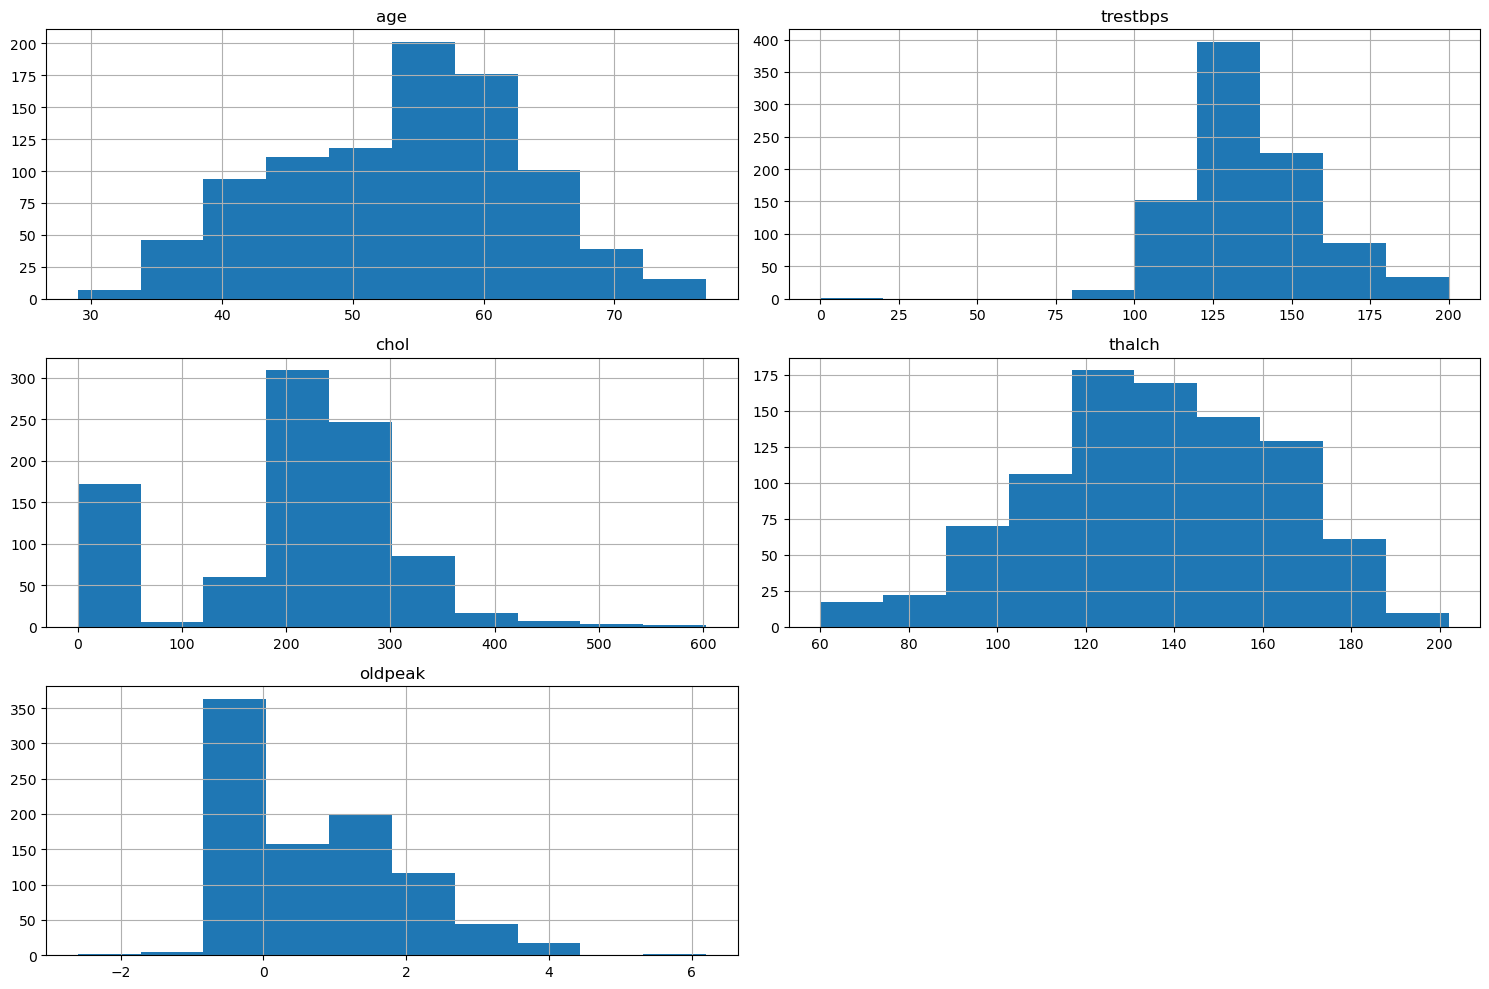

In [17]:
# Create histograms for all numerical columns in the heart_diseases DataFrame with a specified figure size
heart_diseases.hist(figsize=(15, 10))

# Adjust the layout to prevent overlapping of plot elements
plt.tight_layout()

# Display the histograms
plt.show()

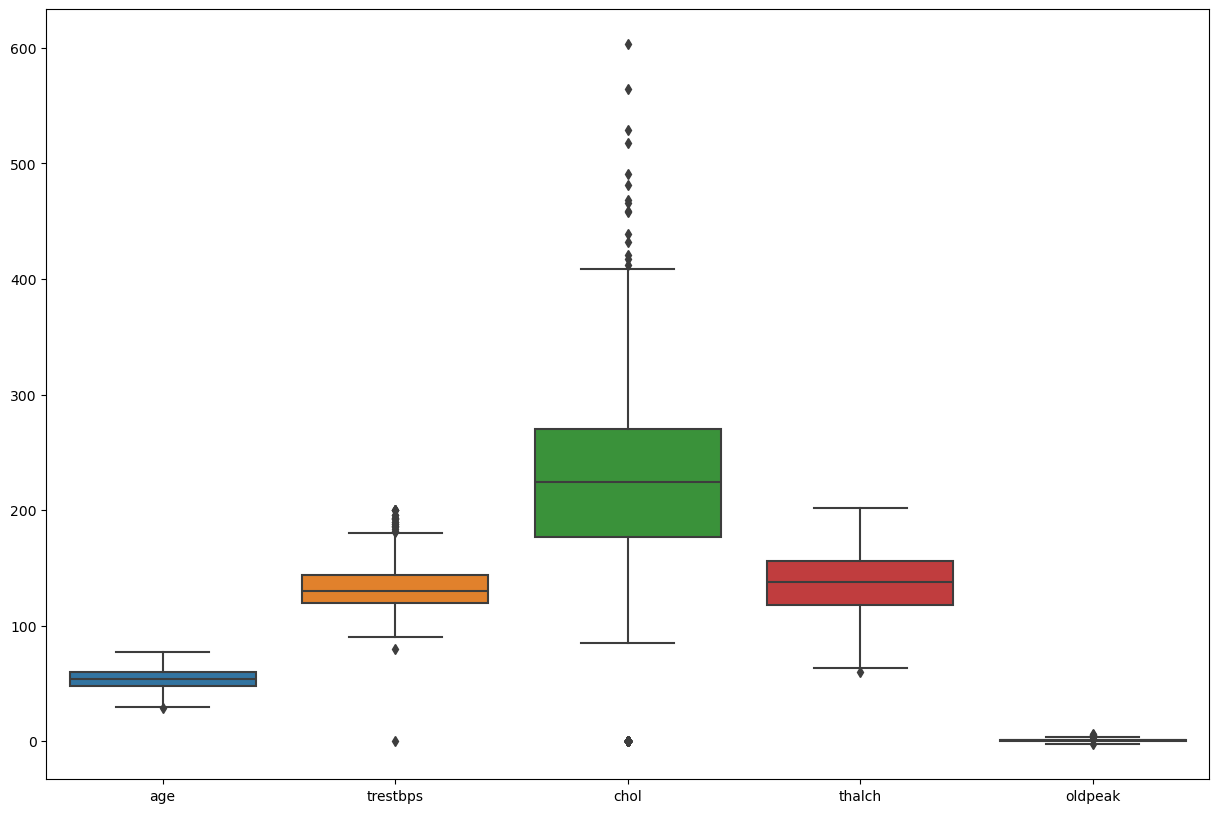

In [18]:
# Create a new figure with a specified size of 15x10 inches for the boxplot
plt.figure(figsize=(15, 10))

# Create a boxplot for the heart_diseases DataFrame using seaborn
sns.boxplot(data=heart_diseases)

# Display the boxplot
plt.show()

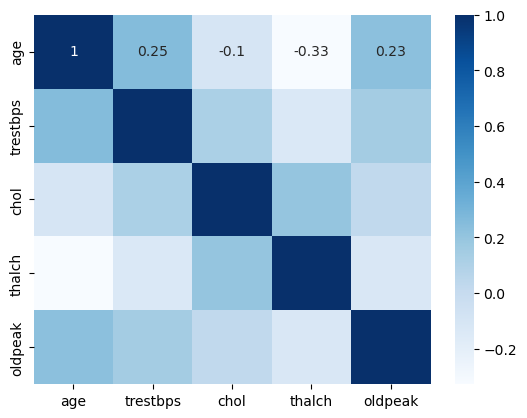

In [19]:
# Import the warnings library to handle warning messages
import warnings

# Suppress all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Create a heatmap of the correlation matrix for the heart_diseases DataFrame using seaborn
# annot=True adds the correlation coefficient values to the heatmap cells
# cmap="Blues" sets the color map of the heatmap to shades of blue
sns.heatmap(heart_diseases.corr(), annot=True, cmap="Blues")

# Display the heatmap
plt.show()

In [20]:
# Compute and display the correlation matrix of the heart_diseases DataFrame
heart_diseases.corr()

age  trestbps      chol    thalch   oldpeak
age       1.000000  0.253999 -0.099967 -0.328088  0.229439
trestbps  0.253999  1.000000  0.117488 -0.133360  0.148248
chol     -0.099967  0.117488  1.000000  0.197907  0.029577
thalch   -0.328088 -0.133360  0.197907  1.000000 -0.125057
oldpeak   0.229439  0.148248  0.029577 -0.125057  1.000000

In [21]:
# Drop the 'num' column from the heart_diseases DataFrame to create feature matrix X
# 'axis=1' indicates that we are dropping a column (not a row)
X = heart_diseases.drop(["num"], axis=1)

# Select the 'num' column from the heart_diseases DataFrame as the target variable y
y = heart_diseases["num"]

In [22]:
# Display the feature matrix X, which contains all columns except 'num'
X

age     sex               cp  trestbps  chol    fbs           restecg  \
0     63    Male   typical angina       145   233   True    lv hypertrophy   
1     41    Male  atypical angina       135   203  False            normal   
2     57    Male     asymptomatic       140   192  False            normal   
3     52    Male   typical angina       118   186  False    lv hypertrophy   
4     57    Male     asymptomatic       110   201  False            normal   
5     66    Male     asymptomatic       160   228  False    lv hypertrophy   
6     56    Male      non-anginal       130   276  False            normal   
7     48    Male      non-anginal       110   211  False            normal   
8     57    Male  atypical angina       140   260   True            normal   
9     53    Male      non-anginal       155   175   True  st-t abnormality   
10    30  Female   typical angina       170   237  False  st-t abnormality   
11    66  Female   typical angina       150   226  False            normal   
12    54    Male      non-anginal       125   273  False    lv hypertrophy   
13    53    Male      non-anginal       130   197   True    lv hypertrophy   
14    56    Male  atypical angina       120   240  False            normal   
15    37    Male      non-anginal       130   250  False            normal   
16    46  Female      non-anginal       142   177  False    lv hypertrophy   
17    68  Female      non-anginal       120   211  False    lv hypertrophy   
18    76  Female      non-anginal       140   197  False  st-t abnormality   
19    58  Female     asymptomatic       100   248  False    lv hypertrophy   
20    42  Female     asymptomatic       102   265  False    lv hypertrophy   
21    64  Female     asymptomatic       130   303  False            normal   
22    71  Female     asymptomatic       112   149  False            normal   
23    69    Male   typical angina       160   234   True    lv hypertrophy   
24    58  Female     asymptomatic       130   197  False            normal   
25    45  Female  atypical angina       112   160  False            normal   
26    53  Female     asymptomatic       130   264  False    lv hypertrophy   
27    44  Female      non-anginal       118   242  False            normal   
28    66    Male     asymptomatic       120   302  False    lv hypertrophy   
29    66  Female      non-anginal       146   278  False    lv hypertrophy   
30    39  Female      non-anginal       138   220  False            normal   
31    56  Female  atypical angina       140   294  False    lv hypertrophy   
32    62  Female     asymptomatic       140   394  False    lv hypertrophy   
33    54  Female      non-anginal       110   214  False            normal   
34    50  Female      non-anginal       120   219  False            normal   
35    55  Female  atypical angina       135   250  False    lv hypertrophy   
36    49  Female  atypical angina       134   271  False            normal   
37    37    Male      non-anginal       118   240  False    lv hypertrophy   
38    43  Female      non-anginal       122   213  False            normal   
39    51    Male      non-anginal       125   245   True    lv hypertrophy   
40    41    Male      non-anginal       130   214  False    lv hypertrophy   
41    52  Female      non-anginal       136   196  False    lv hypertrophy   
42    42  Female      non-anginal       120   209  False            normal   
43    45  Female  atypical angina       130   234  False    lv hypertrophy   
44    44  Female      non-anginal       108   141  False            normal   
45    48    Male  atypical angina       130   245  False    lv hypertrophy   
46    43    Male     asymptomatic       115   303  False            normal   
47    36    Male      non-anginal       112   340  False            normal   
48    59    Male      non-anginal       130   318  False            normal   
49    61    Male      non-anginal       150   243   True            normal   
50    46    Male     asympt

In [23]:
# Display the target variable y, which contains the values from the 'num' column
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [24]:
# Import the train_test_split function from scikit-learn to split the data into training and validation sets
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
# 'test_size=0.3' specifies that 30% of the data should be used for validation
# 'stratify=y' ensures that the class distribution in the target variable is preserved in both splits
# 'random_state=107' sets a seed for reproducibility of the split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=107)

# Print the size (number of rows) of the training feature matrix X
print("X Train size : ", X_train.shape)

# Print the size (number of rows) of the validation feature matrix X
print("X Val size  : ", X_val.shape)

# Print the size (number of rows) of the training target variable y
print("y Train size : ", y_train.shape)

# Print the size (number of rows) of the validation target variable y
print("y Val size  : ", y_val.shape)

X Train size :  (635, 12)
X Val size  :  (273, 12)
y Train size :  (635,)
y Val size  :  (273,)


In [25]:
# Display the count of each unique value in the y_train Series to inspect the class distribution in the training set
y_train.value_counts()

0    279
1    185
2     76
3     75
4     20
Name: num, dtype: int64

In [26]:
# Display the count of each unique value in the y_val Series to inspect the class distribution in the validation set
y_val.value_counts()

0    120
1     80
2     33
3     32
4      8
Name: num, dtype: int64

### 3. Feature Engineering:


#### If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [27]:
# Import the StandardScaler class from scikit-learn for standardizing features
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns of the training feature matrix X_train
# This computes the mean and standard deviation for standardization
scaler = scaler.fit(X_train[num_cols])

# Apply the transformation to standardize the numerical columns in X_train
# The result is a DataFrame with standardized values, using the same column names as X_train[num_cols]
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=X_train[num_cols].columns)

# Display the first few rows of the standardized training feature matrix
X_train_std.head()

age  trestbps      chol    thalch   oldpeak
0 -0.068114  0.448999  0.217015 -0.936038 -0.825166
1  0.690698 -0.133164 -0.060204 -2.054915 -0.090786
2  0.257091  0.060890  1.853501  0.518501  0.918987
3 -1.585738  1.322245 -0.489446  0.891459 -0.825166
4 -1.585738 -1.103437  0.637315 -0.152825 -0.825166

In [28]:
# Apply the previously fitted scaler to the numerical columns of the validation feature matrix X_val
# This standardizes the validation features using the mean and standard deviation computed from the training set
X_val_std = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=X_val[num_cols].columns)

# Display the first few rows of the standardized validation feature matrix
X_val_std.head()

age  trestbps      chol    thalch   oldpeak
0 -1.694139  0.254945 -0.239055  1.376306 -0.825166
1 -1.585738 -0.133164  2.059180 -0.600375 -0.825166
2 -1.043729  0.109404  2.586790 -0.040937 -0.825166
3  0.799100 -0.375732 -1.804000 -1.159814 -0.825166
4  0.799100  3.262790 -1.804000 -2.465169 -0.825166

In [29]:
# Convert categorical columns in the training feature matrix X_train to dummy/indicator variables
# 'drop_first=True' removes the first category to avoid multicollinearity
X_train_dummies = pd.get_dummies(X_train[cat_cols], drop_first=True)

# Display the resulting DataFrame with dummy variables for the training set
X_train_dummies

sex_Male  cp_atypical angina  cp_non-anginal  cp_typical angina  \
175         1                   0               0                  0   
386         1                   0               0                  0   
716         0                   0               0                  0   
340         1                   0               1                  0   
275         1                   0               0                  0   
810         1                   0               1                  0   
264         1                   1               0                  0   
583         1                   0               0                  0   
790         0                   1               0                  0   
289         1                   0               1                  0   
536         1                   0               1                  0   
409         1                   0               0                  0   
371         1                   1               0                  0   
614         1                   0               0                  0   
697         1                   0               0                  0   
304         1                   1               0                  0   
845         1                   0               1                  0   
492         1                   0               0                  0   
148         1                   0               1                  0   
647         1                   0               0                  0   
465         1                   0               0                  0   
528         1                   0               0                  0   
185         1                   0               0                  0   
43          0                   1               0                  0   
733         1                   0               0                  0   
541         1                   0               0                  0   
59          0                   0               1                  0   
189         1                   1               0                  0   
422         0                   0               0                  0   
462         1                   0               0                  0   
618         1                   0               0                  0   
439         1                   0               0                  0   
288         1                   0               0                  0   
145         1                   0               0                  0   
841         1                   0               0                  0   
413         1                   0               1                  0   
888         1                   0               0                  0   
498         1                   0               0                  0   
391         1                   0               1                  0   
144         1                   0               0                  0   
377         1                   1               0                  0   
202         1                   0               1                  0   
475         1                   0               0                  0   
653         1                   0               0                  0   
359         1                   1               0                  0   
504         1                   0               0                  0   
42          0                   0               1                  0   
657         1                   0               1                  0   
348         1                   0               1                  0   
67          1                   0               1                  0   
885         1                   0               0                  0   
749         1                   0               0                  0   
190         1                   0               0                  0   
646         1                   0               0                  0   
243         1                   1            

In [30]:
# Reset the index of the X_train_dummies DataFrame to ensure a default integer index
X_train_dummies = X_train_dummies.reset_index(drop=True)

# Display the resulting DataFrame with the reset index
X_train_dummies

sex_Male  cp_atypical angina  cp_non-anginal  cp_typical angina  \
0           1                   0               0                  0   
1           1                   0               0                  0   
2           0                   0               0                  0   
3           1                   0               1                  0   
4           1                   0               0                  0   
5           1                   0               1                  0   
6           1                   1               0                  0   
7           1                   0               0                  0   
8           0                   1               0                  0   
9           1                   0               1                  0   
10          1                   0               1                  0   
11          1                   0               0                  0   
12          1                   1               0                  0   
13          1                   0               0                  0   
14          1                   0               0                  0   
15          1                   1               0                  0   
16          1                   0               1                  0   
17          1                   0               0                  0   
18          1                   0               1                  0   
19          1                   0               0                  0   
20          1                   0               0                  0   
21          1                   0               0                  0   
22          1                   0               0                  0   
23          0                   1               0                  0   
24          1                   0               0                  0   
25          1                   0               0                  0   
26          0                   0               1                  0   
27          1                   1               0                  0   
28          0                   0               0                  0   
29          1                   0               0                  0   
30          1                   0               0                  0   
31          1                   0               0                  0   
32          1                   0               0                  0   
33          1                   0               0                  0   
34          1                   0               0                  0   
35          1                   0               1                  0   
36          1                   0               0                  0   
37          1                   0               0                  0   
38          1                   0               1                  0   
39          1                   0               0                  0   
40          1                   1               0                  0   
41          1                   0               1                  0   
42          1                   0               0                  0   
43          1                   0               0                  0   
44          1                   1               0                  0   
45          1                   0               0                  0   
46          0                   0               1                  0   
47          1                   0               1                  0   
48          1                   0               1                  0   
49          1                   0               1                  0   
50          1                   0               0                  0   
51          1                   0               0                  0   
52          1                   0               0                  0   
53          1                   0               0                  0   
54          1                   1            

In [31]:
# Drop the 'index' column from the X_train_dummies DataFrame
# This column was created during the index reset and is no longer needed
# X_train_dummies = X_train_dummies.drop(["index"], axis=1)

# Display the resulting DataFrame after dropping the 'index' column
# X_train_dummies

In [32]:
# Convert categorical columns in the validation feature matrix X_val to dummy/indicator variables
# 'drop_first=True' removes the first category to avoid multicollinearity
X_val_dummies = pd.get_dummies(X_val[cat_cols], drop_first=True)

# Display the resulting DataFrame with dummy variables for the validation set
X_val_dummies

sex_Male  cp_atypical angina  cp_non-anginal  cp_typical angina  \
112         1                   0               1                  0   
261         1                   1               0                  0   
628         1                   0               0                  0   
793         1                   0               0                  0   
791         1                   0               1                  0   
380         1                   0               1                  0   
179         1                   0               0                  1   
345         0                   1               0                  0   
142         1                   0               1                  0   
787         1                   0               1                  0   
753         1                   0               0                  0   
616         1                   0               1                  0   
831         1                   0               0                  0   
388         1                   0               0                  1   
844         1                   0               0                  0   
401         0                   0               0                  0   
887         1                   0               0                  0   
834         1                   0               0                  0   
641         1                   0               0                  1   
476         1                   0               0                  0   
214         1                   0               0                  0   
91          0                   1               0                  0   
871         1                   0               1                  0   
501         1                   0               1                  0   
712         1                   0               0                  0   
265         0                   0               1                  0   
41          0                   0               1                  0   
573         1                   0               0                  0   
455         1                   0               1                  0   
8           1                   1               0                  0   
799         1                   0               0                  0   
854         1                   0               0                  1   
486         1                   0               0                  0   
354         1                   0               0                  0   
133         0                   1               0                  0   
158         1                   0               0                  0   
149         1                   0               0                  1   
355         1                   0               0                  0   
807         1                   0               0                  0   
104         1                   1               0                  0   
317         1                   0               1                  0   
321         1                   1               0                  0   
636         1                   0               0                  0   
225         1                   0               1                  0   
537         1                   0               0                  0   
6           1                   0               1                  0   
586         1                   0               0                  0   
30          0                   0               1                  0   
326         0                   1               0                  0   
813         1                   0               0                  0   
457         1                   0               0                  0   
68          0                   0               1                  0   
331         1                   1               0                  0   
95          0                   1               0                  0   
217         0                   0            

In [33]:
# Reset the index of the X_val_dummies DataFrame to ensure a default integer index
X_val_dummies = X_val_dummies.reset_index(drop=True)

# Display the resulting DataFrame with the reset index
X_val_dummies

sex_Male  cp_atypical angina  cp_non-anginal  cp_typical angina  \
0           1                   0               1                  0   
1           1                   1               0                  0   
2           1                   0               0                  0   
3           1                   0               0                  0   
4           1                   0               1                  0   
5           1                   0               1                  0   
6           1                   0               0                  1   
7           0                   1               0                  0   
8           1                   0               1                  0   
9           1                   0               1                  0   
10          1                   0               0                  0   
11          1                   0               1                  0   
12          1                   0               0                  0   
13          1                   0               0                  1   
14          1                   0               0                  0   
15          0                   0               0                  0   
16          1                   0               0                  0   
17          1                   0               0                  0   
18          1                   0               0                  1   
19          1                   0               0                  0   
20          1                   0               0                  0   
21          0                   1               0                  0   
22          1                   0               1                  0   
23          1                   0               1                  0   
24          1                   0               0                  0   
25          0                   0               1                  0   
26          0                   0               1                  0   
27          1                   0               0                  0   
28          1                   0               1                  0   
29          1                   1               0                  0   
30          1                   0               0                  0   
31          1                   0               0                  1   
32          1                   0               0                  0   
33          1                   0               0                  0   
34          0                   1               0                  0   
35          1                   0               0                  0   
36          1                   0               0                  1   
37          1                   0               0                  0   
38          1                   0               0                  0   
39          1                   1               0                  0   
40          1                   0               1                  0   
41          1                   1               0                  0   
42          1                   0               0                  0   
43          1                   0               1                  0   
44          1                   0               0                  0   
45          1                   0               1                  0   
46          1                   0               0                  0   
47          0                   0               1                  0   
48          0                   1               0                  0   
49          1                   0               0                  0   
50          1                   0               0                  0   
51          0                   0               1                  0   
52          1                   1               0                  0   
53          0                   1               0                  0   
54          0                   0            

In [34]:
# Drop the 'index' column from the X_val_dummies DataFrame
# This column was created during the index reset and is no longer needed
# X_val_dummies = X_val_dummies.drop(["index"], axis=1)

# Display the resulting DataFrame after dropping the 'index' column
# X_val_dummies

In [35]:
# Concatenate the standardized training features (X_train_std) and the dummy variables (X_train_dummies)
# along the columns (axis=1) to create the final training feature matrix
final_X_train = pd.concat([X_train_std, X_train_dummies], axis=1)

# Display the resulting DataFrame with both standardized features and dummy variables
final_X_train

age  trestbps      chol    thalch   oldpeak  sex_Male  \
0   -0.068114  0.448999  0.217015 -0.936038 -0.825166         1   
1    0.690698 -0.133164 -0.060204 -2.054915 -0.090786         1   
2    0.257091  0.060890  1.853501  0.518501  0.918987         0   
3   -1.585738  1.322245 -0.489446  0.891459 -0.825166         1   
4   -1.585738 -1.103437  0.637315 -0.152825 -0.825166         1   
5    1.774715  1.322245  0.601545 -0.898742  1.836963         1   
6   -0.935327  0.351972  0.199130 -0.525784 -0.825166         1   
7   -0.393319  0.594540 -1.804000  0.108246 -0.182583         1   
8    0.473895  0.157918  1.048672  0.593092 -0.825166         0   
9   -0.068114 -0.618300 -0.060204  0.145542 -0.825166         1   
10   0.582296 -0.375732 -1.804000  1.450898  1.561570         1   
11  -1.585738 -1.103437  0.699913  0.518501 -0.825166         1   
12   0.148690 -1.103437  0.109705  1.637377 -0.090786         1   
13   1.015903 -1.782627  0.923476 -0.563080  0.092809         1   
14  -0.176516 -0.133164 -1.804000 -0.600375 -0.825166         1   
15  -1.368934 -0.375732  0.601545  0.294726 -0.825166         1   
16   1.991518 -0.618300  0.109705 -1.271701  0.092809         1   
17  -2.019344 -0.327219  0.717798  0.742276 -0.825166         1   
18   1.557912  0.060890  0.467406  0.555797 -0.825166         1   
19   0.040288  0.351972  1.281178 -0.674967 -0.825166         1   
20   0.582296  0.109404 -1.804000 -0.786855  0.092809         1   
21   0.690698  1.322245 -1.804000  0.481205 -0.457976         1   
22   0.690698  0.934136 -1.804000 -0.674967 -0.825166         1   
23  -0.935327 -0.133164  0.288556  1.450898 -0.274381         0   
24   0.907501 -0.860869 -1.804000 -0.302008  1.469773         1   
25  -0.610122  1.322245  1.138097 -1.644660  0.551797         1   
26  -0.610122 -0.133164  0.655200  0.108246 -0.641571         0   
27  -0.068114 -0.133164 -1.804000 -0.600375 -0.182583         1   
28   1.015903 -0.424246 -0.042319 -0.003641 -0.825166         0   
29   0.040288 -0.424246  0.574717 -1.010630  1.194380         1   
30   0.365493 -0.521273  0.556832 -1.346293 -0.825166         1   
31   0.473895  1.807381 -1.804000 -1.159814 -0.825166         1   
32   0.257091 -0.618300 -1.043884  0.145542 -0.825166         1   
33  -1.802541 -0.618300  0.190188  1.189826 -0.825166         1   
34   0.799100 -0.133164 -1.804000 -2.204098  1.469773         1   
35  -0.826926  0.837108  0.261728  0.406613  2.479546         1   
36  -0.393319  0.837108  0.369038 -0.302008  1.561570         1   
37  -0.284917 -0.133164 -1.804000  1.003347 -0.825166         1   
38  -2.019344  0.497513 -0.364250 -2.054915 -0.090786         1   
39  -0.826926 -1.103437  0.342211  0.145542 -0.825166         1   
40  -0.176516  0.351972 -0.909746  0.070950 -0.825166         1   
41   1.341108 -1.103437  0.100762 -1.383589  0.368202         1   
42  -2.019344 -0.618300 -0.033376 -0.227417  0.643595         1   
43   0.257091 -0.521273 -1.804000 -0.302008 -0.090786         1   
44  -1.477336  0.351972  0.780396  1.339010 -0.825166         1   
45  -0.284917  1.758867  0.834051 -1.308997 -0.090786         1   
46  -1.260532 -0.618300  0.064992  1.376306 -0.825166         0   
47   0.799100  0.448999  0.735683 -1.234405 -0.090786         1   
48  -1.477336 -0.133164  0.708855  1.152531 -0.825166         1   
49  -1.260532 -0.133164 -0.194342  0.518501 -0.825166         1   
50   1.774715  0.594540 -0.247997 -0.413896  1.561570         1   
51   1.015903 -1.103437  0.449521  0.145542  1.010785         1   
52  -0.068114 -2.558846 -1.804000  0.182838  1.010785         1   
53  -0.068114 -0.618300  0.395866 -0.749559 -0.825166         1   
54  -1.585738  2.777653  0.351153 -1.122518 -0.825166         1   
55  -0.176516 -1.200464  0.279613  0.406613 -0.733368         1   
56   0.148690 -0.521273  0.386924 -2.577057 -0.090786         1   
57  -1.368934 -0.133164  0.386924  0.518501 -0.825166         0   
58  -0.176516  1.322245  1.155982 -1.570068  1.469773    

In [36]:
# Calculate the number of missing (null) values in each column of the final_X_train DataFrame
final_X_train.isnull().sum()

age                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_True                    0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [37]:
# Concatenate the standardized validation features (X_val_std) and the dummy variables (X_val_dummies)
# along the columns (axis=1) to create the final validation feature matrix
final_X_val = pd.concat([X_val_std, X_val_dummies], axis=1)

# Display the resulting DataFrame with both standardized features and dummy variables for the validation set
final_X_val

age  trestbps      chol    thalch   oldpeak  sex_Male  \
0   -1.694139  0.254945 -0.239055  1.376306 -0.825166         1   
1   -1.585738 -0.133164  2.059180 -0.600375 -0.825166         1   
2   -1.043729  0.109404  2.586790 -0.040937 -0.825166         1   
3    0.799100 -0.375732 -1.804000 -1.159814 -0.825166         1   
4    0.799100  3.262790 -1.804000 -2.465169 -0.825166         1   
5    1.666313  2.049949  0.619430 -2.017619 -0.090786         1   
6   -1.477336  0.351972 -0.024434  1.562785  0.460000         1   
7   -0.501721 -0.424246 -0.006548  1.040643 -0.825166         0   
8   -1.043729 -0.133164  0.279613  1.600081 -0.457976         1   
9   -0.718524  1.079676 -1.804000 -0.674967  0.092809         1   
10  -1.477336 -1.831141 -1.804000  0.294726 -0.825166         1   
11   0.473895  1.322245  0.082877 -1.644660 -0.825166         1   
12  -0.610122 -0.133164  0.485292  0.518501 -0.825166         1   
13   1.232706  0.982649  0.449521 -0.674967 -0.090786         1   
14   1.015903  0.837108 -1.804000 -1.868435  1.010785         1   
15  -0.718524 -0.618300  0.029222 -1.420885  1.010785         0   
16   0.365493  1.564813  0.780396 -0.451192  0.092809         1   
17   1.666313  0.885622 -1.804000  0.481205 -0.090786         1   
18  -2.127746  0.351972 -0.408963  1.637377 -0.825166         1   
19   0.473895 -0.230191  0.127590 -0.190121  1.194380         1   
20   0.582296  0.351972  0.646257  0.667684  1.010785         1   
21  -1.368934 -0.327219  0.932419  1.003347 -0.825166         0   
22  -0.284917  0.885622  1.227523 -0.525784 -0.090786         1   
23  -0.068114  1.322245 -1.804000 -0.525784 -0.825166         1   
24   0.582296 -1.103437  0.333268  0.220134  0.276405         1   
25  -0.610122 -0.618300 -0.060204 -0.413896 -0.825166         0   
26  -0.176516  0.157918 -0.051261  1.227122 -0.733368         0   
27   0.148690  0.351972  0.592602 -0.302008  0.551797         1   
28  -0.393319  0.351972  0.279613  1.003347 -0.274381         1   
29   0.365493  0.351972  0.521062  0.145542 -0.825166         1   
30   0.799100 -0.133164 -1.804000 -0.786855 -0.825166         1   
31   1.449510  0.448999  0.610487 -0.413896  1.469773         1   
32  -1.477336  0.934136  0.190188  1.674673 -0.825166         1   
33  -1.260532  0.351972  1.397431  1.264418 -0.825166         1   
34  -2.127746 -0.715328  0.073934  2.084927 -0.182583         0   
35   0.582296  0.109404  0.288556  0.928755 -0.366178         1   
36   0.582296  2.195490  0.610487  0.332021  3.030331         1   
37  -1.043729  0.837108  1.880329  1.264418 -0.825166         1   
38   0.257091 -0.375732 -1.804000 -1.234405  0.092809         1   
39  -0.501721 -0.133164  0.574717  1.301714 -0.274381         1   
40  -0.826926 -0.618300  0.252785  0.518501 -0.825166         1   
41  -1.477336 -0.133164  0.655200  0.518501 -0.825166         1   
42  -1.694139 -1.103437 -0.051261  1.115235 -0.825166         1   
43  -0.935327 -1.103437 -1.804000  0.070950 -0.916963         1   
44  -0.176516  1.322245  0.395866 -2.017619  2.846736         1   
45   0.257091 -0.133164  0.664142 -0.302008  0.092809         1   
46   0.473895 -0.133164  0.547889  0.145542  1.010785         1   
47  -1.585738  0.254945  0.163360  0.593092 -0.825166         0   
48  -1.152131  0.837108 -0.140687  0.667684 -0.825166         0   
49  -1.152131 -0.618300 -0.221170 -0.600375  1.469773         1   
50   1.774715 -0.860869 -1.804000 -1.644660 -0.825166         1   
51   1.232706  1.322245  1.415316  0.555797 -0.090786         0   
52   0.148690  0.594540  1.111270  0.704980 -0.825166         1   
53  -1.368934 -1.346005 -0.033376  1.189826 -0.825166         0   
54  -0.068114 -0.230191  0.127590 -0.786855 -0.825166         0   
55  -1.260532  0.837108  0.592602 -0.003641 -0.825166         1   
56   1.341108  0.837108 -1.804000 -1.047926  1.010785         1   
57   0.257091 -0.618300 -1.804000  0.443909 -0.825166         1   
58  -0.718524  0.351972 -0.078089  0.332021  0.092809    

In [38]:
# Calculate the number of missing (null) values in each column of the final_X_val DataFrame
final_X_val.isnull().sum()

age                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_True                    0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

### 4. Decision Tree Classification:

#### Split the dataset into training and testing sets (e.g., using an 80-20 split)..


#### Implement a Decision Tree Classification model using a library like scikit-learn.

#### Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [39]:
# Import the DecisionTreeClassifier class from scikit-learn for classification
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier with the specified parameters
# 'criterion="gini"' uses the Gini impurity to measure the quality of splits
# 'max_depth=3' limits the depth of the tree to avoid overfitting
model_1 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Fit the DecisionTreeClassifier model to the training data
# This trains the model using the final_X_train feature matrix and y_train target variable
model_1 = model_1.fit(final_X_train, y_train)

# Display the trained DecisionTreeClassifier model
model_1

DecisionTreeClassifier(max_depth=3)

In [40]:
# Use the trained DecisionTreeClassifier model to make predictions on the training data
# The predictions are stored in y_train_preds_1
y_train_preds_1 = model_1.predict(final_X_train)

# Display the predicted values for the training set
y_train_preds_1

array([1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 3, 1, 3, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 1, 1,
       0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 3, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 0,
       1, 3, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,

In [41]:
# Use the trained DecisionTreeClassifier model to make predictions on the validation data
# The predictions are stored in y_val_preds_1
y_val_preds_1 = model_1.predict(final_X_val)

# Display the predicted values for the validation set
y_val_preds_1

array([0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 3, 1, 1, 0, 3, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 3, 1, 3, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       3, 1, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 3, 1, 0, 0, 3, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 3, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 3, 0, 0], dtype=int64)

In [42]:
# Import various metrics from scikit-learn for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute the confusion matrix for the training predictions
# 'y_train_preds_1' are the predicted values from the training set
# 'y_train' are the true target values from the training set
model_1_train_cm = confusion_matrix(y_train, y_train_preds_1)

# Display the confusion matrix for the training set
model_1_train_cm

array([[237,  37,   1,   4,   0],
       [ 60, 123,   0,   2,   0],
       [ 16,  52,   5,   3,   0],
       [ 20,  36,   3,  16,   0],
       [  6,  10,   0,   4,   0]], dtype=int64)

In [43]:
# Compute the confusion matrix for the validation predictions
# 'y_val_preds_1' are the predicted values from the validation set
# 'y_val' are the true target values from the validation set
model_1_val_cm = confusion_matrix(y_val, y_val_preds_1)

# Display the confusion matrix for the validation set
model_1_val_cm

array([[104,  15,   0,   1,   0],
       [ 30,  46,   0,   4,   0],
       [ 10,  19,   0,   4,   0],
       [  8,  20,   0,   4,   0],
       [  5,   3,   0,   0,   0]], dtype=int64)

In [44]:
# Generate a classification report for the training predictions
# 'y_train_preds_1' are the predicted values from the training set
# 'y_train' are the true target values from the training set
model_1_train_report = classification_report(y_train, y_train_preds_1)

# Print the classification report, which includes precision, recall, f1-score, and support for each class
print(model_1_train_report)

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       279
           1       0.48      0.66      0.56       185
           2       0.56      0.07      0.12        76
           3       0.55      0.21      0.31        75
           4       0.00      0.00      0.00        20

    accuracy                           0.60       635
   macro avg       0.46      0.36      0.35       635
weighted avg       0.58      0.60      0.55       635



In [45]:
# Generate a classification report for the validation predictions
# 'y_val_preds_1' are the predicted values from the validation set
# 'y_val' are the true target values from the validation set
model_1_val_report = classification_report(y_val, y_val_preds_1)

# Print the classification report, which includes precision, recall, f1-score, and support for each class
print(model_1_val_report)

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       120
           1       0.45      0.57      0.50        80
           2       0.00      0.00      0.00        33
           3       0.31      0.12      0.18        32
           4       0.00      0.00      0.00         8

    accuracy                           0.56       273
   macro avg       0.28      0.31      0.29       273
weighted avg       0.46      0.56      0.50       273



In [46]:
# Calculate the accuracy score for the training predictions
# 'y_train_preds_1' are the predicted values from the training set
# 'y_train' are the true target values from the training set
model_1_train_accuracy = accuracy_score(y_train, y_train_preds_1)

# Display the accuracy score for the training set
model_1_train_accuracy

0.6

In [47]:
# Calculate the accuracy score for the validation predictions
# 'y_val_preds_1' are the predicted values from the validation set
# 'y_val' are the true target values from the validation set
model_1_val_accuracy = accuracy_score(y_val, y_val_preds_1)

# Display the accuracy score for the validation set
model_1_val_accuracy

0.5641025641025641

In [48]:
# Calculate the precision score for the training predictions using the micro average
# 'y_train_preds_1' are the predicted values from the training set
# 'y_train' are the true target values from the training set
# 'average="micro"' calculates precision by counting the total true positives, false positives, and false negatives across all classes
model_1_train_precision = precision_score(y_train, y_train_preds_1, average="micro")

# Display the precision score for the training set
model_1_train_precision

0.6

In [49]:
# Calculate the precision score for the validation predictions using the micro average
# 'y_val_preds_1' are the predicted values from the validation set
# 'y_val' are the true target values from the validation set
# 'average="micro"' calculates precision by aggregating the contributions of all classes to compute the average precision
model_1_val_precision = precision_score(y_val, y_val_preds_1, average="micro")

# Display the precision score for the validation set
model_1_val_precision

0.5641025641025641

In [50]:
# Calculate the recall score for the training predictions using the micro average
# 'y_train_preds_1' are the predicted values from the training set
# 'y_train' are the true target values from the training set
# 'average="micro"' calculates recall by aggregating the contributions of all classes to compute the average recall
model_1_train_recall = recall_score(y_train, y_train_preds_1, average="micro")

# Display the recall score for the training set
model_1_train_recall

0.6

In [51]:
# Calculate the recall score for the validation predictions using the micro average
# 'y_val_preds_1' are the predicted values from the validation set
# 'y_val' are the true target values from the validation set
# 'average="micro"' calculates recall by aggregating the contributions of all classes to compute the average recall
model_1_val_recall = recall_score(y_val, y_val_preds_1, average="micro")

# Display the recall score for the validation set
model_1_val_recall

0.5641025641025641

In [52]:
# Compute the ROC AUC score for the training predictions using the one-vs-rest (ovr) approach
# 'y_train' are the true target values from the training set
# 'model_1.predict_proba(final_X_train)' returns the predicted probabilities for each class
# 'multi_class="ovr"' specifies the one-vs-rest approach for multi-class classification
model_1_train_roc_auc_ovr = roc_auc_score(y_train, model_1.predict_proba(final_X_train), multi_class='ovr')

# Compute the ROC AUC score for the training predictions using the one-vs-one (ovo) approach
# 'multi_class="ovo"' specifies the one-vs-one approach for multi-class classification
model_1_train_roc_auc_ovo = roc_auc_score(y_train, model_1.predict_proba(final_X_train), multi_class='ovo')

# Print the ROC AUC score for the one-vs-rest approach
print(model_1_train_roc_auc_ovr)

# Print the ROC AUC score for the one-vs-one approach
print(model_1_train_roc_auc_ovo)

0.7512754469935838
0.6997646912192328


In [53]:
# Compute the ROC AUC score for the validation predictions using the one-vs-rest (ovr) approach
# 'y_val' are the true target values from the validation set
# 'model_1.predict_proba(final_X_val)' returns the predicted probabilities for each class
# 'multi_class="ovr"' specifies the one-vs-rest approach for multi-class classification
model_1_val_roc_auc_ovr = roc_auc_score(y_val, model_1.predict_proba(final_X_val), multi_class='ovr')

# Compute the ROC AUC score for the validation predictions using the one-vs-one (ovo) approach
# 'multi_class="ovo"' specifies the one-vs-one approach for multi-class classification
model_1_val_roc_auc_ovo = roc_auc_score(y_val, model_1.predict_proba(final_X_val), multi_class='ovo')

# Print the ROC AUC score for the one-vs-rest approach on the validation set
print(model_1_val_roc_auc_ovr)

# Print the ROC AUC score for the one-vs-one approach on the validation set
print(model_1_val_roc_auc_ovo)

0.6798527933569825
0.6308548768939394


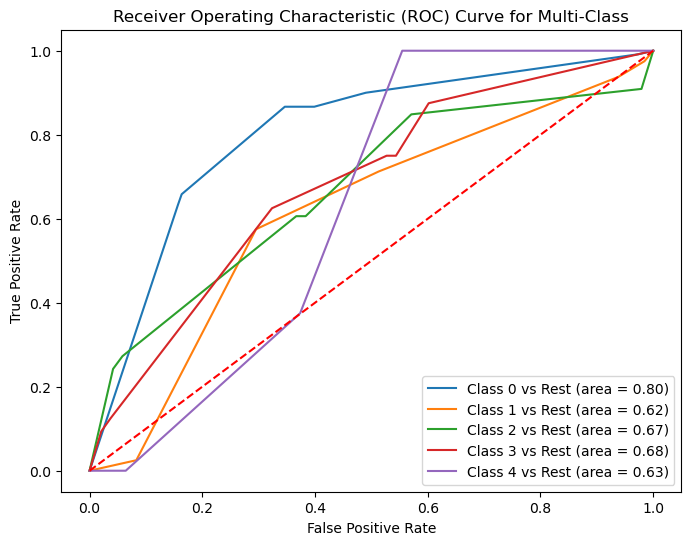

In [54]:
# Import necessary functions for calculating and plotting the ROC curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Binarize the output labels for each class using One-vs-Rest scheme
# 'classes=[0, 1, 2, 3, 4]' should be adjusted to your specific classes
y_test_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]  # Number of classes

# Initialize dictionaries to store false positive rate (fpr) and true positive rate (tpr) for each class
fpr = dict()
tpr = dict()

# Calculate ROC curve for each class
for i in range(n_classes):
    # Compute false positive rate (fpr) and true positive rate (tpr) for the i-th class
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model_1.predict_proba(final_X_val)[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    # Plot the ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} vs Rest (area = {roc_auc_score(y_test_bin[:, i], model_1.predict_proba(final_X_val)[:, i]):.2f})')

# Plot a diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')

# Display the legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [55]:
# Identify the first quartile (Q1) for each numerical column in the training data
Q1 = final_X_train[num_cols].quantile(0.25)

# Identify the third quartile (Q3) for each numerical column in the training data
Q3 = final_X_train[num_cols].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each numerical column
IQR = Q3 - Q1

# Define the lower and upper whisker bounds for outlier detection
# Outliers are points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

# Identify outlier rows in the training data based on the whisker bounds
# The condition checks if any numerical column's value is outside the whisker bounds
outliers = final_X_train[(final_X_train[num_cols] < lower_whisker) | (final_X_train[num_cols] > upper_whisker)]

# Remove rows that have all NaN values, if any, to get a clean list of outlier rows
outlier_rows = outliers.dropna(how='all')

# Count the number of outlier observations
num_of_outliers = outliers.dropna(how='all').shape[0]

# Print the computed values for Q1, Q3, IQR, lower and upper bounds
print(f"Q1:\n{Q1}\n")
print(f"Q3:\n{Q3}\n")
print(f"IQR:\n{IQR}\n")
print(f"Lower Bound:\n{lower_whisker}\n")
print(f"Upper Bound:\n{upper_whisker}\n")

# Print the number of outlier observations
print(f"Number of Outlier Observations: {num_of_outliers}")

# Display the outlier rows
outlier_rows

Q1:
age        -0.718524
trestbps   -0.618300
chol       -0.234583
thalch     -0.674967
oldpeak    -0.825166
Name: 0.25, dtype: float64

Q3:
age         0.690698
trestbps    0.473256
chol        0.601545
thalch      0.742276
oldpeak     0.551797
Name: 0.75, dtype: float64

IQR:
age         1.409222
trestbps    1.091557
chol        0.836128
thalch      1.417243
oldpeak     1.376963
dtype: float64

Lower Bound:
age        -2.832357
trestbps   -2.255635
chol       -1.488775
thalch     -2.800832
oldpeak    -2.890611
dtype: float64

Upper Bound:
age         2.804531
trestbps    2.110591
chol        1.855737
thalch      2.868141
oldpeak     2.617242
dtype: float64

Number of Outlier Observations: 159


age  trestbps      chol    thalch   oldpeak  sex_Male  \
7    NaN       NaN -1.804000       NaN       NaN       NaN   
10   NaN       NaN -1.804000       NaN       NaN       NaN   
14   NaN       NaN -1.804000       NaN       NaN       NaN   
20   NaN       NaN -1.804000       NaN       NaN       NaN   
21   NaN       NaN -1.804000       NaN       NaN       NaN   
22   NaN       NaN -1.804000       NaN       NaN       NaN   
24   NaN       NaN -1.804000       NaN       NaN       NaN   
27   NaN       NaN -1.804000       NaN       NaN       NaN   
31   NaN       NaN -1.804000       NaN       NaN       NaN   
34   NaN       NaN -1.804000       NaN       NaN       NaN   
37   NaN       NaN -1.804000       NaN       NaN       NaN   
43   NaN       NaN -1.804000       NaN       NaN       NaN   
52   NaN -2.558846 -1.804000       NaN       NaN       NaN   
54   NaN  2.777653       NaN       NaN       NaN       NaN   
61   NaN       NaN -1.804000 -2.838128       NaN       NaN   
68   NaN       NaN -1.804000       NaN       NaN       NaN   
69   NaN  2.195490       NaN       NaN       NaN       NaN   
70   NaN       NaN  2.363226       NaN       NaN       NaN   
81   NaN       NaN -1.804000       NaN       NaN       NaN   
82   NaN       NaN       NaN       NaN  4.315496       NaN   
83   NaN       NaN -1.804000       NaN       NaN       NaN   
94   NaN       NaN -1.804000       NaN       NaN       NaN   
100  NaN       NaN -1.804000       NaN       NaN       NaN   
102  NaN       NaN -1.804000       NaN       NaN       NaN   
115  NaN  2.292517       NaN       NaN       NaN       NaN   
117  NaN  2.292517       NaN       NaN       NaN       NaN   
123  NaN       NaN -1.804000       NaN       NaN       NaN   
124  NaN       NaN -1.804000       NaN       NaN       NaN   
127  NaN  2.244004       NaN       NaN       NaN       NaN   
128  NaN       NaN -1.804000       NaN       NaN       NaN   
130  NaN  2.292517       NaN       NaN       NaN       NaN   
132  NaN       NaN -1.804000       NaN       NaN       NaN   
133  NaN       NaN       NaN       NaN  2.663141       NaN   
134  NaN       NaN -1.804000       NaN -3.211902       NaN   
139  NaN  3.262790       NaN       NaN  2.846736       NaN   
140  NaN       NaN  2.828239       NaN       NaN       NaN   
143  NaN       NaN -1.804000       NaN       NaN       NaN   
145  NaN       NaN -1.804000       NaN       NaN       NaN   
149  NaN  2.292517       NaN       NaN       NaN       NaN   
153  NaN       NaN -1.804000       NaN       NaN       NaN   
160  NaN       NaN -1.804000       NaN       NaN       NaN   
162  NaN  2.486572       NaN       NaN       NaN       NaN   
163  NaN       NaN -1.804000       NaN       NaN       NaN   
166  NaN       NaN -1.804000       NaN       NaN       NaN   
170  NaN       NaN -1.804000       NaN       NaN       NaN   
174  NaN       NaN -1.804000       NaN       NaN       NaN   
176  NaN       NaN  3.588355       NaN       NaN       NaN   
179  NaN       NaN -1.804000       NaN       NaN       NaN   
183  NaN       NaN -1.804000       NaN       NaN       NaN   
184  NaN       NaN  2.926607       NaN       NaN       NaN   
187  NaN       NaN -1.804000       NaN       NaN       NaN   
195  NaN  2.680626 -1.804000       NaN       NaN       NaN   
212  NaN       NaN -1.804000       NaN       NaN       NaN   
215  NaN       NaN -1.804000       NaN       NaN       NaN   
218  NaN  2.583599       NaN       NaN       NaN       NaN   
219  NaN       NaN  2.497364       NaN       NaN       NaN   
225  NaN       NaN -1.804000       NaN       NaN       NaN   
237  NaN       NaN -1.804000       NaN       NaN       NaN   
251  NaN       NaN -1.804000       NaN       NaN       NaN   
255  NaN       NaN -1.804000       NaN       NaN       NaN   
256  NaN       NaN -1.804000       NaN       NaN       NaN   
258  NaN       NaN -1.804000       NaN       NaN       NaN   
259  NaN  3.068735       NaN       NaN       NaN       NaN   
260  NaN       NaN -1.804000       Na

In [56]:
# Retrieve the indices of the outlier rows as a list
# 'outlier_rows' contains the rows identified as outliers
# '.index.tolist()' converts the indices of these rows to a Python list
outlier_rows_index_list = outlier_rows.index.tolist()

# Display the list of outlier row indices
outlier_rows_index_list

[7,
 10,
 14,
 20,
 21,
 22,
 24,
 27,
 31,
 34,
 37,
 43,
 52,
 54,
 61,
 68,
 69,
 70,
 81,
 82,
 83,
 94,
 100,
 102,
 115,
 117,
 123,
 124,
 127,
 128,
 130,
 132,
 133,
 134,
 139,
 140,
 143,
 145,
 149,
 153,
 160,
 162,
 163,
 166,
 170,
 174,
 176,
 179,
 183,
 184,
 187,
 195,
 212,
 215,
 218,
 219,
 225,
 237,
 251,
 255,
 256,
 258,
 259,
 260,
 265,
 266,
 271,
 276,
 282,
 306,
 308,
 310,
 311,
 313,
 320,
 321,
 326,
 327,
 328,
 331,
 334,
 335,
 337,
 339,
 342,
 350,
 351,
 356,
 357,
 364,
 377,
 378,
 380,
 385,
 390,
 392,
 393,
 395,
 396,
 397,
 403,
 406,
 408,
 414,
 417,
 418,
 421,
 425,
 432,
 433,
 434,
 439,
 444,
 445,
 447,
 448,
 452,
 457,
 460,
 487,
 495,
 498,
 503,
 505,
 516,
 518,
 519,
 526,
 530,
 540,
 541,
 548,
 554,
 555,
 557,
 558,
 559,
 560,
 561,
 563,
 564,
 566,
 568,
 569,
 579,
 584,
 588,
 596,
 597,
 602,
 610,
 611,
 617,
 621,
 622,
 623,
 624,
 631,
 634]

In [57]:
# Identify the first quartile (Q1) for each numerical column in the validation data
Q1 = final_X_val[num_cols].quantile(0.25)

# Identify the third quartile (Q3) for each numerical column in the validation data
Q3 = final_X_val[num_cols].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each numerical column
IQR = Q3 - Q1

# Define the lower and upper whisker bounds for outlier detection in the validation data
# Outliers are points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

# Identify outlier rows in the validation data based on the whisker bounds
# The condition checks if any numerical column's value is outside the whisker bounds
outliers = final_X_val[(final_X_val[num_cols] < lower_whisker) | (final_X_val[num_cols] > upper_whisker)]

# Remove rows that have all NaN values, if any, to get a clean list of outlier rows
outlier_rows = outliers.dropna(how='all')

# Count the number of outlier observations in the validation data
num_of_outliers = outliers.dropna(how='all').shape[0]

# Print the computed values for Q1, Q3, IQR, lower and upper bounds for the validation data
print(f"Q1:\n{Q1}\n")
print(f"Q3:\n{Q3}\n")
print(f"IQR:\n{IQR}\n")
print(f"Lower Bound:\n{lower_whisker}\n")
print(f"Upper Bound:\n{upper_whisker}\n")

# Print the number of outlier observations in the validation data
print(f"Number of Outlier Observations: {num_of_outliers}")

# Display the outlier rows from the validation data
outlier_rows

Q1:
age        -0.610122
trestbps   -0.618300
chol       -0.203284
thalch     -0.600375
oldpeak    -0.825166
Name: 0.25, dtype: float64

Q3:
age         0.799100
trestbps    0.594540
chol        0.610487
thalch      0.704980
oldpeak     0.551797
Name: 0.75, dtype: float64

IQR:
age         1.409222
trestbps    1.212841
chol        0.813772
thalch      1.305356
oldpeak     1.376963
dtype: float64

Lower Bound:
age        -2.723955
trestbps   -2.437561
chol       -1.423942
thalch     -2.558409
oldpeak    -2.890611
dtype: float64

Upper Bound:
age         2.912933
trestbps    2.413801
chol        1.831145
thalch      2.663014
oldpeak     2.617242
dtype: float64

Number of Outlier Observations: 66


age  trestbps      chol  thalch   oldpeak  sex_Male  cp_atypical angina  \
1    NaN       NaN  2.059180     NaN       NaN       NaN                 NaN   
2    NaN       NaN  2.586790     NaN       NaN       NaN                 NaN   
3    NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
4    NaN  3.262790 -1.804000     NaN       NaN       NaN                 NaN   
9    NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
10   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
14   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
17   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
23   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
30   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
36   NaN       NaN       NaN     NaN  3.030331       NaN                 NaN   
37   NaN       NaN  1.880329     NaN       NaN       NaN                 NaN   
38   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
43   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
44   NaN       NaN       NaN     NaN  2.846736       NaN                 NaN   
50   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
56   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
57   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
60   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
66   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
68   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
73   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
74   NaN  3.262790       NaN     NaN       NaN       NaN                 NaN   
82   NaN       NaN       NaN     NaN  3.030331       NaN                 NaN   
83   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
88   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
89   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
94   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
97   NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
99   NaN  2.923194       NaN     NaN       NaN       NaN                 NaN   
100  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
105  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
111  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
113  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
121  NaN  2.777653       NaN     NaN       NaN       NaN                 NaN   
129  NaN  3.068735       NaN     NaN       NaN       NaN                 NaN   
131  NaN  3.262790 -1.804000     NaN       NaN       NaN                 NaN   
132  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
134  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
140  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
143  NaN  2.874681       NaN     NaN       NaN       NaN                 NaN   
145  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
147  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
149  NaN       NaN  3.239596     NaN       NaN       NaN                 NaN   
150  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
152  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
154  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
160  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
168  NaN       NaN -1.804000     NaN       NaN       NaN                 NaN   
172  

In [58]:
# Retrieve the indices of the outlier rows from the validation data as a list
# 'outlier_rows' contains the rows identified as outliers in the validation set
# '.index.tolist()' converts the indices of these rows to a Python list
outlier_rows_index_list = outlier_rows.index.tolist()

# Display the list of outlier row indices from the validation data
outlier_rows_index_list

[1,
 2,
 3,
 4,
 9,
 10,
 14,
 17,
 23,
 30,
 36,
 37,
 38,
 43,
 44,
 50,
 56,
 57,
 60,
 66,
 68,
 73,
 74,
 82,
 83,
 88,
 89,
 94,
 97,
 99,
 100,
 105,
 111,
 113,
 121,
 129,
 131,
 132,
 134,
 140,
 143,
 145,
 147,
 149,
 150,
 152,
 154,
 160,
 168,
 172,
 175,
 183,
 185,
 191,
 195,
 212,
 229,
 237,
 240,
 244,
 258,
 260,
 263,
 265,
 268,
 270]

In [59]:
# List of indices representing the outlier rows in the training data
train_outliers_indices = [
    7, 10, 14, 20, 21, 22, 24, 27, 31, 34,
    37, 43, 52, 54, 61, 68, 69, 70, 81, 82,
    83, 94, 100, 102, 115, 117, 123, 124, 127, 128,
    130, 132, 133, 134, 139, 140, 143, 145, 149, 153,
    160, 162, 163, 166, 170, 174, 176, 179, 183, 184,
    187, 195, 212, 215, 218, 219, 225, 237, 251, 255,
    256, 258, 259, 260, 265, 266, 271, 276, 282, 306,
    308, 310, 311, 313, 320, 321, 326, 327, 328, 331,
    334, 335, 337, 339, 342, 350, 351, 356, 357, 364,
    377, 378, 380, 385, 390, 392, 393, 395, 396, 397,
    403, 406, 408, 414, 417, 418, 421, 425, 432, 433,
    434, 439, 444, 445, 447, 448, 452, 457, 460, 487,
    495, 498, 503, 505, 516, 518, 519, 526, 530, 540,
    541, 548, 554, 555, 557, 558, 559, 560, 561, 563,
    564, 566, 568, 569, 579, 584, 588, 596, 597, 602,
    610, 611, 617, 621, 622, 623, 624, 631, 634
]

# Drop rows with indices listed in 'train_outliers_indices' from the training data DataFrame
# 'final_X_train_2' will contain the cleaned DataFrame without the outliers
final_X_train_2 = final_X_train.drop(index=train_outliers_indices)

# Display the cleaned DataFrame after removing outlier rows
final_X_train_2

age  trestbps      chol    thalch   oldpeak  sex_Male  \
0   -0.068114  0.448999  0.217015 -0.936038 -0.825166         1   
1    0.690698 -0.133164 -0.060204 -2.054915 -0.090786         1   
2    0.257091  0.060890  1.853501  0.518501  0.918987         0   
3   -1.585738  1.322245 -0.489446  0.891459 -0.825166         1   
4   -1.585738 -1.103437  0.637315 -0.152825 -0.825166         1   
5    1.774715  1.322245  0.601545 -0.898742  1.836963         1   
6   -0.935327  0.351972  0.199130 -0.525784 -0.825166         1   
8    0.473895  0.157918  1.048672  0.593092 -0.825166         0   
9   -0.068114 -0.618300 -0.060204  0.145542 -0.825166         1   
11  -1.585738 -1.103437  0.699913  0.518501 -0.825166         1   
12   0.148690 -1.103437  0.109705  1.637377 -0.090786         1   
13   1.015903 -1.782627  0.923476 -0.563080  0.092809         1   
15  -1.368934 -0.375732  0.601545  0.294726 -0.825166         1   
16   1.991518 -0.618300  0.109705 -1.271701  0.092809         1   
17  -2.019344 -0.327219  0.717798  0.742276 -0.825166         1   
18   1.557912  0.060890  0.467406  0.555797 -0.825166         1   
19   0.040288  0.351972  1.281178 -0.674967 -0.825166         1   
23  -0.935327 -0.133164  0.288556  1.450898 -0.274381         0   
25  -0.610122  1.322245  1.138097 -1.644660  0.551797         1   
26  -0.610122 -0.133164  0.655200  0.108246 -0.641571         0   
28   1.015903 -0.424246 -0.042319 -0.003641 -0.825166         0   
29   0.040288 -0.424246  0.574717 -1.010630  1.194380         1   
30   0.365493 -0.521273  0.556832 -1.346293 -0.825166         1   
32   0.257091 -0.618300 -1.043884  0.145542 -0.825166         1   
33  -1.802541 -0.618300  0.190188  1.189826 -0.825166         1   
35  -0.826926  0.837108  0.261728  0.406613  2.479546         1   
36  -0.393319  0.837108  0.369038 -0.302008  1.561570         1   
38  -2.019344  0.497513 -0.364250 -2.054915 -0.090786         1   
39  -0.826926 -1.103437  0.342211  0.145542 -0.825166         1   
40  -0.176516  0.351972 -0.909746  0.070950 -0.825166         1   
41   1.341108 -1.103437  0.100762 -1.383589  0.368202         1   
42  -2.019344 -0.618300 -0.033376 -0.227417  0.643595         1   
44  -1.477336  0.351972  0.780396  1.339010 -0.825166         1   
45  -0.284917  1.758867  0.834051 -1.308997 -0.090786         1   
46  -1.260532 -0.618300  0.064992  1.376306 -0.825166         0   
47   0.799100  0.448999  0.735683 -1.234405 -0.090786         1   
48  -1.477336 -0.133164  0.708855  1.152531 -0.825166         1   
49  -1.260532 -0.133164 -0.194342  0.518501 -0.825166         1   
50   1.774715  0.594540 -0.247997 -0.413896  1.561570         1   
51   1.015903 -1.103437  0.449521  0.145542  1.010785         1   
53  -0.068114 -0.618300  0.395866 -0.749559 -0.825166         1   
55  -0.176516 -1.200464  0.279613  0.406613 -0.733368         1   
56   0.148690 -0.521273  0.386924 -2.577057 -0.090786         1   
57  -1.368934 -0.133164  0.386924  0.518501 -0.825166         0   
58  -0.176516  1.322245  1.155982 -1.570068  1.469773         1   
59  -1.043729 -0.133164  0.118647 -0.040937 -0.825166         1   
60  -1.585738 -0.715328  0.154417  0.145542  0.276405         1   
62  -0.393319  1.807381  0.064992 -0.749559 -0.825166         1   
63   0.473895  0.837108  0.154417 -0.674967 -0.825166         1   
64   0.148690 -0.812355 -0.140687 -1.271701 -0.825166         1   
65  -0.068114  0.546027  0.878764 -0.302008  0.551797         1   
66   0.148690 -0.618300  0.163360 -0.078233 -0.825166         1   
67   0.907501  1.322245 -0.078089 -0.749559 -0.825166         0   
71   0.365493 -0.230191  0.905591  0.854164 -0.825166         0   
72  -0.610122 -1.297491  0.547889 -0.973334 -0.825166         1   
73  -0.176516 -0.230191  0.029222  1.786560 -0.825166         1   
74   0.040288 -0.618300  0.324326  0.667684 -0.825166         1   
75  -0.284917 -1.103437 -0.239055 -0.488488 -0.274381         1   
76   0.907501 -0.618300  0.467406 -1.607364 -0.825166    

In [60]:
# Display the shape of the cleaned DataFrame after removing outliers
# This will show the number of rows and columns in 'final_X_train_2'
final_X_train_2_shape = final_X_train_2.shape

# Display the shape of the cleaned DataFrame
final_X_train_2_shape

(476, 17)

In [61]:
# Reset the index of the cleaned DataFrame 'final_X_train_2'
# This will create a new default integer index and move the old index to a new column named 'index'
final_X_train_2 = final_X_train_2.reset_index()

# Display the DataFrame after resetting the index
final_X_train_2

index       age  trestbps      chol    thalch   oldpeak  sex_Male  \
0        0 -0.068114  0.448999  0.217015 -0.936038 -0.825166         1   
1        1  0.690698 -0.133164 -0.060204 -2.054915 -0.090786         1   
2        2  0.257091  0.060890  1.853501  0.518501  0.918987         0   
3        3 -1.585738  1.322245 -0.489446  0.891459 -0.825166         1   
4        4 -1.585738 -1.103437  0.637315 -0.152825 -0.825166         1   
5        5  1.774715  1.322245  0.601545 -0.898742  1.836963         1   
6        6 -0.935327  0.351972  0.199130 -0.525784 -0.825166         1   
7        8  0.473895  0.157918  1.048672  0.593092 -0.825166         0   
8        9 -0.068114 -0.618300 -0.060204  0.145542 -0.825166         1   
9       11 -1.585738 -1.103437  0.699913  0.518501 -0.825166         1   
10      12  0.148690 -1.103437  0.109705  1.637377 -0.090786         1   
11      13  1.015903 -1.782627  0.923476 -0.563080  0.092809         1   
12      15 -1.368934 -0.375732  0.601545  0.294726 -0.825166         1   
13      16  1.991518 -0.618300  0.109705 -1.271701  0.092809         1   
14      17 -2.019344 -0.327219  0.717798  0.742276 -0.825166         1   
15      18  1.557912  0.060890  0.467406  0.555797 -0.825166         1   
16      19  0.040288  0.351972  1.281178 -0.674967 -0.825166         1   
17      23 -0.935327 -0.133164  0.288556  1.450898 -0.274381         0   
18      25 -0.610122  1.322245  1.138097 -1.644660  0.551797         1   
19      26 -0.610122 -0.133164  0.655200  0.108246 -0.641571         0   
20      28  1.015903 -0.424246 -0.042319 -0.003641 -0.825166         0   
21      29  0.040288 -0.424246  0.574717 -1.010630  1.194380         1   
22      30  0.365493 -0.521273  0.556832 -1.346293 -0.825166         1   
23      32  0.257091 -0.618300 -1.043884  0.145542 -0.825166         1   
24      33 -1.802541 -0.618300  0.190188  1.189826 -0.825166         1   
25      35 -0.826926  0.837108  0.261728  0.406613  2.479546         1   
26      36 -0.393319  0.837108  0.369038 -0.302008  1.561570         1   
27      38 -2.019344  0.497513 -0.364250 -2.054915 -0.090786         1   
28      39 -0.826926 -1.103437  0.342211  0.145542 -0.825166         1   
29      40 -0.176516  0.351972 -0.909746  0.070950 -0.825166         1   
30      41  1.341108 -1.103437  0.100762 -1.383589  0.368202         1   
31      42 -2.019344 -0.618300 -0.033376 -0.227417  0.643595         1   
32      44 -1.477336  0.351972  0.780396  1.339010 -0.825166         1   
33      45 -0.284917  1.758867  0.834051 -1.308997 -0.090786         1   
34      46 -1.260532 -0.618300  0.064992  1.376306 -0.825166         0   
35      47  0.799100  0.448999  0.735683 -1.234405 -0.090786         1   
36      48 -1.477336 -0.133164  0.708855  1.152531 -0.825166         1   
37      49 -1.260532 -0.133164 -0.194342  0.518501 -0.825166         1   
38      50  1.774715  0.594540 -0.247997 -0.413896  1.561570         1   
39      51  1.015903 -1.103437  0.449521  0.145542  1.010785         1   
40      53 -0.068114 -0.618300  0.395866 -0.749559 -0.825166         1   
41      55 -0.176516 -1.200464  0.279613  0.406613 -0.733368         1   
42      56  0.148690 -0.521273  0.386924 -2.577057 -0.090786         1   
43      57 -1.368934 -0.133164  0.386924  0.518501 -0.825166         0   
44      58 -0.176516  1.322245  1.155982 -1.570068  1.469773         1   
45      59 -1.043729 -0.133164  0.118647 -0.040937 -0.825166         1   
46      60 -1.585738 -0.715328  0.154417  0.145542  0.276405         1   
47      62 -0.393319  1.807381  0.064992 -0.749559 -0.825166         1   
48      63  0.473895  0.837108  0.154417 -0.674967 -0.825166         1   
49      64  0.148690 -0.812355 -0.140687 -1.271701 -0.825166         1   
50      65 -0.068114  0.546027  0.878764 -0.302008  0.551797         1   
51      66  0.148690 -0.618300  0.163360 -0.078233 -0.825166         1   
52      67  0.907501  1.322245 -0.078089 -0.749559 -0.825166         0   
53      7

In [62]:
# Drop the 'index' column from the DataFrame 'final_X_train_2'
# This column was created when the index was reset and is no longer needed
final_X_train_2 = final_X_train_2.drop(["index"], axis = 1)

# Display the DataFrame after dropping the 'index' column
final_X_train_2

age  trestbps      chol    thalch   oldpeak  sex_Male  \
0   -0.068114  0.448999  0.217015 -0.936038 -0.825166         1   
1    0.690698 -0.133164 -0.060204 -2.054915 -0.090786         1   
2    0.257091  0.060890  1.853501  0.518501  0.918987         0   
3   -1.585738  1.322245 -0.489446  0.891459 -0.825166         1   
4   -1.585738 -1.103437  0.637315 -0.152825 -0.825166         1   
5    1.774715  1.322245  0.601545 -0.898742  1.836963         1   
6   -0.935327  0.351972  0.199130 -0.525784 -0.825166         1   
7    0.473895  0.157918  1.048672  0.593092 -0.825166         0   
8   -0.068114 -0.618300 -0.060204  0.145542 -0.825166         1   
9   -1.585738 -1.103437  0.699913  0.518501 -0.825166         1   
10   0.148690 -1.103437  0.109705  1.637377 -0.090786         1   
11   1.015903 -1.782627  0.923476 -0.563080  0.092809         1   
12  -1.368934 -0.375732  0.601545  0.294726 -0.825166         1   
13   1.991518 -0.618300  0.109705 -1.271701  0.092809         1   
14  -2.019344 -0.327219  0.717798  0.742276 -0.825166         1   
15   1.557912  0.060890  0.467406  0.555797 -0.825166         1   
16   0.040288  0.351972  1.281178 -0.674967 -0.825166         1   
17  -0.935327 -0.133164  0.288556  1.450898 -0.274381         0   
18  -0.610122  1.322245  1.138097 -1.644660  0.551797         1   
19  -0.610122 -0.133164  0.655200  0.108246 -0.641571         0   
20   1.015903 -0.424246 -0.042319 -0.003641 -0.825166         0   
21   0.040288 -0.424246  0.574717 -1.010630  1.194380         1   
22   0.365493 -0.521273  0.556832 -1.346293 -0.825166         1   
23   0.257091 -0.618300 -1.043884  0.145542 -0.825166         1   
24  -1.802541 -0.618300  0.190188  1.189826 -0.825166         1   
25  -0.826926  0.837108  0.261728  0.406613  2.479546         1   
26  -0.393319  0.837108  0.369038 -0.302008  1.561570         1   
27  -2.019344  0.497513 -0.364250 -2.054915 -0.090786         1   
28  -0.826926 -1.103437  0.342211  0.145542 -0.825166         1   
29  -0.176516  0.351972 -0.909746  0.070950 -0.825166         1   
30   1.341108 -1.103437  0.100762 -1.383589  0.368202         1   
31  -2.019344 -0.618300 -0.033376 -0.227417  0.643595         1   
32  -1.477336  0.351972  0.780396  1.339010 -0.825166         1   
33  -0.284917  1.758867  0.834051 -1.308997 -0.090786         1   
34  -1.260532 -0.618300  0.064992  1.376306 -0.825166         0   
35   0.799100  0.448999  0.735683 -1.234405 -0.090786         1   
36  -1.477336 -0.133164  0.708855  1.152531 -0.825166         1   
37  -1.260532 -0.133164 -0.194342  0.518501 -0.825166         1   
38   1.774715  0.594540 -0.247997 -0.413896  1.561570         1   
39   1.015903 -1.103437  0.449521  0.145542  1.010785         1   
40  -0.068114 -0.618300  0.395866 -0.749559 -0.825166         1   
41  -0.176516 -1.200464  0.279613  0.406613 -0.733368         1   
42   0.148690 -0.521273  0.386924 -2.577057 -0.090786         1   
43  -1.368934 -0.133164  0.386924  0.518501 -0.825166         0   
44  -0.176516  1.322245  1.155982 -1.570068  1.469773         1   
45  -1.043729 -0.133164  0.118647 -0.040937 -0.825166         1   
46  -1.585738 -0.715328  0.154417  0.145542  0.276405         1   
47  -0.393319  1.807381  0.064992 -0.749559 -0.825166         1   
48   0.473895  0.837108  0.154417 -0.674967 -0.825166         1   
49   0.148690 -0.812355 -0.140687 -1.271701 -0.825166         1   
50  -0.068114  0.546027  0.878764 -0.302008  0.551797         1   
51   0.148690 -0.618300  0.163360 -0.078233 -0.825166         1   
52   0.907501  1.322245 -0.078089 -0.749559 -0.825166         0   
53   0.365493 -0.230191  0.905591  0.854164 -0.825166         0   
54  -0.610122 -1.297491  0.547889 -0.973334 -0.825166         1   
55  -0.176516 -0.230191  0.029222  1.786560 -0.825166         1   
56   0.040288 -0.618300  0.324326  0.667684 -0.825166         1   
57  -0.284917 -1.103437 -0.239055 -0.488488 -0.274381         1   
58   0.907501 -0.618300  0.467406 -1.607364 -0.825166    

In [63]:
# Reset the index of the 'y_train' Series
# This will create a new default integer index and move the old index to a new column named 'index'
y_train = y_train.reset_index()

# Display the 'y_train' Series after resetting the index
y_train

index num
0      175   0
1      386   0
2      716   2
3      340   0
4      275   0
5      810   3
6      264   0
7      583   1
8      790   3
9      289   0
10     536   1
11     409   1
12     371   0
13     614   1
14     697   2
15     304   0
16     845   3
17     492   1
18     148   0
19     647   1
20     465   1
21     528   1
22     185   0
23      43   0
24     733   2
25     541   1
26      59   0
27     189   0
28     422   1
29     462   1
30     618   1
31     439   1
32     288   0
33     145   0
34     841   3
35     413   1
36     888   4
37     498   1
38     391   0
39     144   0
40     377   0
41     202   0
42     475   1
43     653   1
44     359   0
45     504   1
46      42   0
47     657   1
48     348   0
49      67   0
50     885   4
51     749   2
52     190   0
53     646   1
54     243   0
55     165   0
56     663   1
57     319   0
58     643   1
59     280   0
60     801   3
61     676   2
62     255   0
63     764   2
64     761   2
65     850   3
66     277   0
67     253   0
68     199   0
69     824   3
70     405   1
71      78   0
72     621   1
73     129   0
74     327   0
75      57   0
76     642   1
77     106   0
78     644   1
79      73   0
80     617   1
81     508   1
82     794   3
83     610   1
84     341   0
85     276   0
86     534   1
87     374   0
88     134   0
89     629   1
90     425   1
91     677   2
92     558   1
93     556   1
94     415   1
95     206   0
96     119   0
97     835   3
98     856   3
99     904   4
100    461   1
101    502   1
102    376   0
103    599   1
104    311   0
105    574   1
106    360   0
107    320   0
108    203   0
109    735   2
110    394   0
111    592   1
112    547   1
113    710   2
114    167   0
115    563   1
116     46   0
117    240   0
118     22   0
119    368   0
120     35   0
121    310   0
122    114   0
123    709   2
124    688   2
125    113   0
126    124   0
127    389   0
128    385   0
129     48   0
130    684   2
131    352   0
132    499   1
133    894   4
134    525   1
135    332   0
136    774   3
137    804   3
138    258   0
139    795   3
140    626   1
141    146   0
142    623   1
143    837   3
144    117   0
145    606   1
146     63   0
147    283   0
148    730   2
149    463   1
150    344   0
151    239   0
152    115   0
153    609   1
154    141   0
155    303   0
156    417   1
157    803   3
158    635   1
159     24   0
160    441   1
161    631   1
162    766   2
163    737   2
164    279   0
165    256   0
166    874   3
167    410   1
168    569   1
169    407   1
170    654   1
171    546   1
172    828   3
173    786   3
174    754   2
175    838   3
176    570   1
177    868   3
178     89   0
179    853   3
180     19   0
181    437   1
182    305   0
183    859   3
184    627   1
185    308   0
186     53   0
187    782   3
188    864   3
189    339   0
190     13   0
191    625   1
192    400   1
193     39   0
194     49   0
195    797   3
196    452   1
197    102   0
198    232   0
199    529   1
200     29   0
201    649   1
202    745   2
203    468   1
204    788   3
205    651   1
206    138   0
207    351   0
208    381   0
209    150   0
210    183   0
211    479   1
212    438   1
213    313   0
214    878   3
215    419   1
216    434   1
217    294   0
218    879   3
219    247   0
220    523   1
221     54   0
222    800   3
223    343   0
224    897   4
225    905   4
226    200   0
227    424   1
228    284   0
229    545   1
230    615   1
231    110   0
232    540   1
233     45   0
234     44   0
235    333   0
236    238   0
237    517   1
238     10   0
239    780   3
240    590   1
241     65   0
242    785   3
243    876   3
244    582   1
245    298   0
246    846   3
247    892   4
248    406   1
249    584   1
250    372   0
251    728   2
252     80   0
253    470   1
254    395   0
255    619   1
256    858   3
257    896   4
258    514   1
259    873   3
260    689   2
261    242   0
262    683   2
263    445   1
264    444   1
265    898   4


In [64]:
# Drop the 'index' column from the 'y_train' DataFrame
# This column was created when the index was reset and is no longer needed
y_train = y_train.drop(["index"], axis = 1)

# Display the 'y_train' DataFrame after dropping the 'index' column
y_train

num
0     0
1     0
2     2
3     0
4     0
5     3
6     0
7     1
8     3
9     0
10    1
11    1
12    0
13    1
14    2
15    0
16    3
17    1
18    0
19    1
20    1
21    1
22    0
23    0
24    2
25    1
26    0
27    0
28    1
29    1
30    1
31    1
32    0
33    0
34    3
35    1
36    4
37    1
38    0
39    0
40    0
41    0
42    1
43    1
44    0
45    1
46    0
47    1
48    0
49    0
50    4
51    2
52    0
53    1
54    0
55    0
56    1
57    0
58    1
59    0
60    3
61    2
62    0
63    2
64    2
65    3
66    0
67    0
68    0
69    3
70    1
71    0
72    1
73    0
74    0
75    0
76    1
77    0
78    1
79    0
80    1
81    1
82    3
83    1
84    0
85    0
86    1
87    0
88    0
89    1
90    1
91    2
92    1
93    1
94    1
95    0
96    0
97    3
98    3
99    4
100   1
101   1
102   0
103   1
104   0
105   1
106   0
107   0
108   0
109   2
110   0
111   1
112   1
113   2
114   0
115   1
116   0
117   0
118   0
119   0
120   0
121   0
122   0
123   2
124   2
125   0
126   0
127   0
128   0
129   0
130   2
131   0
132   1
133   4
134   1
135   0
136   3
137   3
138   0
139   3
140   1
141   0
142   1
143   3
144   0
145   1
146   0
147   0
148   2
149   1
150   0
151   0
152   0
153   1
154   0
155   0
156   1
157   3
158   1
159   0
160   1
161   1
162   2
163   2
164   0
165   0
166   3
167   1
168   1
169   1
170   1
171   1
172   3
173   3
174   2
175   3
176   1
177   3
178   0
179   3
180   0
181   1
182   0
183   3
184   1
185   0
186   0
187   3
188   3
189   0
190   0
191   1
192   1
193   0
194   0
195   3
196   1
197   0
198   0
199   1
200   0
201   1
202   2
203   1
204   3
205   1
206   0
207   0
208   0
209   0
210   0
211   1
212   1
213   0
214   3
215   1
216   1
217   0
218   3
219   0
220   1
221   0
222   3
223   0
224   4
225   4
226   0
227   1
228   0
229   1
230   1
231   0
232   1
233   0
234   0
235   0
236   0
237   1
238   0
239   3
240   1
241   0
242   3
243   3
244   1
245   0
246   3
247   4
248   1
249   1
250   0
251   2
252   0
253   1
254   0
255   1
256   3
257   4
258   1
259   3
260   2
261   0
262   2
263   1
264   1
265   4
266   3
267   1
268   1
269   0
270   2
271   1
272   3
273   0
274   0
275   0
276   2
277   0
278   0
279   3
280   0
281   3
282   1
283   3
284   0
285   0
286   3
287   3
288   1
289   1
290   0
291   2
292   3
293   0
294   3
295   0
296   0
297   2
298   1
299   2
300   0
301   0
302   0
303   0
304   0
305   2
306   2
307   3
308   1
309   0
310   2
311   2
312   0
313   1
314   0
315   4
316   0
317   0
318   0
319   0
320   2
321   0
322   1
323   2
324   0
325   0
326   0
327   1
328   2
329   0
330   0
331   1
332   0
333   1
334   4
335   0
336   2
337   1
338   2
339   0
340   2
341   1
342   1
343   1
344   2
345   0
346   1
347   1
348   1
349   4
350   4
351   3
352   0
353   0
354   0
355   0
356   1
357   2
358   1
359   0
360   0
361   1
362   0
363   1
364   2
365   2
366   0
367   1
368   0
369   0
370   1
371   0
372   0
373   1
374   0
375   0
376   0
377   3
378   2
379   0
380   2
381   3
382   3
383   0
384   0
385   0
386   0
387   0
388   0
389   3
390   2
391   1
392   0
393   1
394   0
395   2
396   1
397   1
398   1
399   0
400   1
401   0
402   0
403   2
404   0
405   0
406   2
407   0
408   1
409   2
410   3
411   0
412   0
413   0
414   3
415   2
416   3
417   1
418   4
419   2
420   0
421   0
422   2
423   2
424   0
425   4
426   0
427   1
428   4
429   0
430   1
431   2
432   2
433   1
434   0
435   1
436   0
437   0
438   2
439   1
440   2
441   0
442   0
443   0
444   2
445   0
446   2
447   4
448   1
449   1
450   0
451   3
452   0
453   0
454   0
455   1
456   1
457   2
458   0
459   0
460   0
461   0
462   2
463   0
464   2
465   2
466   0
467   0
468   1
469   0
470   1
471   0
472   1
473   1
474   0
475   0
476   0
477   2
478   1
479   0
480   1
481   1
482   1
483   1
484   0
485   0
486   1
487   3
488   0
489   0
490   3
491   0
492   4
493   0
494   2
495   1
496   0
497   0
498   3
499 

In [65]:
# List of indices representing the outlier rows in the training data
train_outliers_indices = [
    7, 10, 14, 20, 21, 22, 24, 27, 31, 34,
    37, 43, 52, 54, 61, 68, 69, 70, 81, 82,
    83, 94, 100, 102, 115, 117, 123, 124, 127, 128,
    130, 132, 133, 134, 139, 140, 143, 145, 149, 153,
    160, 162, 163, 166, 170, 174, 176, 179, 183, 184,
    187, 195, 212, 215, 218, 219, 225, 237, 251, 255,
    256, 258, 259, 260, 265, 266, 271, 276, 282, 306,
    308, 310, 311, 313, 320, 321, 326, 327, 328, 331,
    334, 335, 337, 339, 342, 350, 351, 356, 357, 364,
    377, 378, 380, 385, 390, 392, 393, 395, 396, 397,
    403, 406, 408, 414, 417, 418, 421, 425, 432, 433,
    434, 439, 444, 445, 447, 448, 452, 457, 460, 487,
    495, 498, 503, 505, 516, 518, 519, 526, 530, 540,
    541, 548, 554, 555, 557, 558, 559, 560, 561, 563,
    564, 566, 568, 569, 579, 584, 588, 596, 597, 602,
    610, 611, 617, 621, 622, 623, 624, 631, 634
]

# Dropping the rows with the specified indices
final_y_train_2 = pd.DataFrame(y_train.drop(index=train_outliers_indices))

# Displaying the cleaned DataFrame
final_y_train_2

num
0     0
1     0
2     2
3     0
4     0
5     3
6     0
8     3
9     0
11    1
12    0
13    1
15    0
16    3
17    1
18    0
19    1
23    0
25    1
26    0
28    1
29    1
30    1
32    0
33    0
35    1
36    4
38    0
39    0
40    0
41    0
42    1
44    0
45    1
46    0
47    1
48    0
49    0
50    4
51    2
53    1
55    0
56    1
57    0
58    1
59    0
60    3
62    0
63    2
64    2
65    3
66    0
67    0
71    0
72    1
73    0
74    0
75    0
76    1
77    0
78    1
79    0
80    1
84    0
85    0
86    1
87    0
88    0
89    1
90    1
91    2
92    1
93    1
95    0
96    0
97    3
98    3
99    4
101   1
103   1
104   0
105   1
106   0
107   0
108   0
109   2
110   0
111   1
112   1
113   2
114   0
116   0
118   0
119   0
120   0
121   0
122   0
125   0
126   0
129   0
131   0
135   0
136   3
137   3
138   0
141   0
142   1
144   0
146   0
147   0
148   2
150   0
151   0
152   0
154   0
155   0
156   1
157   3
158   1
159   0
161   1
164   0
165   0
167   1
168   1
169   1
171   1
172   3
173   3
175   3
177   3
178   0
180   0
181   1
182   0
185   0
186   0
188   3
189   0
190   0
191   1
192   1
193   0
194   0
196   1
197   0
198   0
199   1
200   0
201   1
202   2
203   1
204   3
205   1
206   0
207   0
208   0
209   0
210   0
211   1
213   0
214   3
216   1
217   0
220   1
221   0
222   3
223   0
224   4
226   0
227   1
228   0
229   1
230   1
231   0
232   1
233   0
234   0
235   0
236   0
238   0
239   3
240   1
241   0
242   3
243   3
244   1
245   0
246   3
247   4
248   1
249   1
250   0
252   0
253   1
254   0
257   4
261   0
262   2
263   1
264   1
267   1
268   1
269   0
270   2
272   3
273   0
274   0
275   0
277   0
278   0
279   3
280   0
281   3
283   3
284   0
285   0
286   3
287   3
288   1
289   1
290   0
291   2
292   3
293   0
294   3
295   0
296   0
297   2
298   1
299   2
300   0
301   0
302   0
303   0
304   0
305   2
307   3
309   0
312   0
314   0
315   4
316   0
317   0
318   0
319   0
322   1
323   2
324   0
325   0
329   0
330   0
332   0
333   1
336   2
338   2
340   2
341   1
343   1
344   2
345   0
346   1
347   1
348   1
349   4
352   0
353   0
354   0
355   0
358   1
359   0
360   0
361   1
362   0
363   1
365   2
366   0
367   1
368   0
369   0
370   1
371   0
372   0
373   1
374   0
375   0
376   0
379   0
381   3
382   3
383   0
384   0
386   0
387   0
388   0
389   3
391   1
394   0
398   1
399   0
400   1
401   0
402   0
404   0
405   0
407   0
409   2
410   3
411   0
412   0
413   0
415   2
416   3
419   2
420   0
422   2
423   2
424   0
426   0
427   1
428   4
429   0
430   1
431   2
435   1
436   0
437   0
438   2
440   2
441   0
442   0
443   0
446   2
449   1
450   0
451   3
453   0
454   0
455   1
456   1
458   0
459   0
461   0
462   2
463   0
464   2
465   2
466   0
467   0
468   1
469   0
470   1
471   0
472   1
473   1
474   0
475   0
476   0
477   2
478   1
479   0
480   1
481   1
482   1
483   1
484   0
485   0
486   1
488   0
489   0
490   3
491   0
492   4
493   0
494   2
496   0
497   0
499   0
500   0
501   2
502   1
504   1
506   0
507   1
508   0
509   0
510   1
511   1
512   1
513   4
514   1
515   0
517   0
520   1
521   1
522   0
523   0
524   1
525   1
527   0
528   0
529   1
531   1
532   3
533   0
534   2
535   1
536   0
537   0
538   1
539   2
542   0
543   0
544   1
545   0
546   1
547   0
549   0
550   0
551   1
552   0
553   1
556   0
562   0
565   0
567   3
570   1
571   0
572   0
573   1
574   0
575   0
576   1
577   0
578   0
580   0
581   1
582   3
583   1
585   0
586   3
587   0
589   3
590   0
591   1
592   1
593   0
594   0
595   1
598   1
599   1
600   0
601   0
603   0
604   0
605   2
606   0
607   0
608   0
609   0
612   0
613   0
614   0
615   1
616   0
618   1
619   0
620   0
625   3
626   0
627   0
628   1
629   0
630   0
632   0
633   2

In [66]:
# Calculate and display the shape (rows, columns) of the cleaned y_train DataFrame
final_y_train_2.shape

(476, 1)

In [67]:
# List of indices representing the outlier rows in the Validation data
train_outliers_indices = [
    1, 2, 3, 4, 9, 10, 14, 17, 23, 30,
    36, 37, 38, 43, 44, 50, 56, 57, 60, 66,
    68, 73, 74, 82, 83, 88, 89, 94, 97, 99,
    100, 105, 111, 113, 121, 129, 131, 132, 134, 140,
    143, 145, 147, 149, 150, 152, 154, 160, 168, 172,
    175, 183, 185, 191, 195, 212, 229, 237, 240, 244,
    258, 260, 263, 265, 268, 270
]

# Dropping the rows with the specified indices
final_X_val_2 = final_X_val.drop(index=train_outliers_indices)

# Displaying the cleaned DataFrame
final_X_val_2

age  trestbps      chol    thalch   oldpeak  sex_Male  \
0   -1.694139  0.254945 -0.239055  1.376306 -0.825166         1   
5    1.666313  2.049949  0.619430 -2.017619 -0.090786         1   
6   -1.477336  0.351972 -0.024434  1.562785  0.460000         1   
7   -0.501721 -0.424246 -0.006548  1.040643 -0.825166         0   
8   -1.043729 -0.133164  0.279613  1.600081 -0.457976         1   
11   0.473895  1.322245  0.082877 -1.644660 -0.825166         1   
12  -0.610122 -0.133164  0.485292  0.518501 -0.825166         1   
13   1.232706  0.982649  0.449521 -0.674967 -0.090786         1   
15  -0.718524 -0.618300  0.029222 -1.420885  1.010785         0   
16   0.365493  1.564813  0.780396 -0.451192  0.092809         1   
18  -2.127746  0.351972 -0.408963  1.637377 -0.825166         1   
19   0.473895 -0.230191  0.127590 -0.190121  1.194380         1   
20   0.582296  0.351972  0.646257  0.667684  1.010785         1   
21  -1.368934 -0.327219  0.932419  1.003347 -0.825166         0   
22  -0.284917  0.885622  1.227523 -0.525784 -0.090786         1   
24   0.582296 -1.103437  0.333268  0.220134  0.276405         1   
25  -0.610122 -0.618300 -0.060204 -0.413896 -0.825166         0   
26  -0.176516  0.157918 -0.051261  1.227122 -0.733368         0   
27   0.148690  0.351972  0.592602 -0.302008  0.551797         1   
28  -0.393319  0.351972  0.279613  1.003347 -0.274381         1   
29   0.365493  0.351972  0.521062  0.145542 -0.825166         1   
31   1.449510  0.448999  0.610487 -0.413896  1.469773         1   
32  -1.477336  0.934136  0.190188  1.674673 -0.825166         1   
33  -1.260532  0.351972  1.397431  1.264418 -0.825166         1   
34  -2.127746 -0.715328  0.073934  2.084927 -0.182583         0   
35   0.582296  0.109404  0.288556  0.928755 -0.366178         1   
39  -0.501721 -0.133164  0.574717  1.301714 -0.274381         1   
40  -0.826926 -0.618300  0.252785  0.518501 -0.825166         1   
41  -1.477336 -0.133164  0.655200  0.518501 -0.825166         1   
42  -1.694139 -1.103437 -0.051261  1.115235 -0.825166         1   
45   0.257091 -0.133164  0.664142 -0.302008  0.092809         1   
46   0.473895 -0.133164  0.547889  0.145542  1.010785         1   
47  -1.585738  0.254945  0.163360  0.593092 -0.825166         0   
48  -1.152131  0.837108 -0.140687  0.667684 -0.825166         0   
49  -1.152131 -0.618300 -0.221170 -0.600375  1.469773         1   
51   1.232706  1.322245  1.415316  0.555797 -0.090786         0   
52   0.148690  0.594540  1.111270  0.704980 -0.825166         1   
53  -1.368934 -1.346005 -0.033376  1.189826 -0.825166         0   
54  -0.068114 -0.230191  0.127590 -0.786855 -0.825166         0   
55  -1.260532  0.837108  0.592602 -0.003641 -0.825166         1   
58  -0.718524  0.351972 -0.078089  0.332021  0.092809         1   
59  -0.826926 -0.618300  0.422694  0.294726 -0.090786         1   
61   1.124305  2.292517  1.102327  0.667684 -0.825166         0   
62  -1.368934 -1.006409  0.431636  1.600081 -0.825166         1   
63   1.232706  0.254945  0.717798  1.413602  0.460000         1   
64  -1.694139  0.594540  0.807223 -0.227417 -0.825166         1   
65   1.449510  0.934136  0.091820  0.518501 -0.090786         1   
67   1.232706  0.109404  0.467406 -0.339304  1.745165         1   
69   0.907501  0.934136 -0.435791 -1.458181  0.643595         1   
70  -2.019344 -0.618300  0.950304  1.637377 -0.825166         1   
71   0.148690 -0.375732  0.020279 -1.719252 -0.090786         1   
72   0.148690  0.351972 -0.051261  0.518501 -0.825166         1   
75   1.341108  0.351972 -0.346365 -1.570068  0.092809         1   
76  -0.826926  0.837108 -0.346365 -0.749559 -0.825166         1   
77  -1.585738 -0.133164  0.941361  0.145542 -0.825166         1   
78  -0.718524 -1.200464  0.369038  0.593092 -0.825166         1   
79   0.257091 -0.036137 -0.158572 -1.159814  1.102582         1   
80   0.148690  0.594540  0.413751 -1.495476  1.010785         1   
81   0.582296  1.807381  0.771453  0.854164 -0.641571    

In [68]:
# Calculate and display the shape (rows, columns) of the final_X_val_2 DataFrame
final_X_val_2.shape

(207, 17)

In [69]:
# Reset the index of the final_X_val_2 DataFrame to ensure a clean sequential index
final_X_val_2 = final_X_val_2.reset_index()

# Display the final_X_val_2 DataFrame after resetting the index
final_X_val_2

index       age  trestbps      chol    thalch   oldpeak  sex_Male  \
0        0 -1.694139  0.254945 -0.239055  1.376306 -0.825166         1   
1        5  1.666313  2.049949  0.619430 -2.017619 -0.090786         1   
2        6 -1.477336  0.351972 -0.024434  1.562785  0.460000         1   
3        7 -0.501721 -0.424246 -0.006548  1.040643 -0.825166         0   
4        8 -1.043729 -0.133164  0.279613  1.600081 -0.457976         1   
5       11  0.473895  1.322245  0.082877 -1.644660 -0.825166         1   
6       12 -0.610122 -0.133164  0.485292  0.518501 -0.825166         1   
7       13  1.232706  0.982649  0.449521 -0.674967 -0.090786         1   
8       15 -0.718524 -0.618300  0.029222 -1.420885  1.010785         0   
9       16  0.365493  1.564813  0.780396 -0.451192  0.092809         1   
10      18 -2.127746  0.351972 -0.408963  1.637377 -0.825166         1   
11      19  0.473895 -0.230191  0.127590 -0.190121  1.194380         1   
12      20  0.582296  0.351972  0.646257  0.667684  1.010785         1   
13      21 -1.368934 -0.327219  0.932419  1.003347 -0.825166         0   
14      22 -0.284917  0.885622  1.227523 -0.525784 -0.090786         1   
15      24  0.582296 -1.103437  0.333268  0.220134  0.276405         1   
16      25 -0.610122 -0.618300 -0.060204 -0.413896 -0.825166         0   
17      26 -0.176516  0.157918 -0.051261  1.227122 -0.733368         0   
18      27  0.148690  0.351972  0.592602 -0.302008  0.551797         1   
19      28 -0.393319  0.351972  0.279613  1.003347 -0.274381         1   
20      29  0.365493  0.351972  0.521062  0.145542 -0.825166         1   
21      31  1.449510  0.448999  0.610487 -0.413896  1.469773         1   
22      32 -1.477336  0.934136  0.190188  1.674673 -0.825166         1   
23      33 -1.260532  0.351972  1.397431  1.264418 -0.825166         1   
24      34 -2.127746 -0.715328  0.073934  2.084927 -0.182583         0   
25      35  0.582296  0.109404  0.288556  0.928755 -0.366178         1   
26      39 -0.501721 -0.133164  0.574717  1.301714 -0.274381         1   
27      40 -0.826926 -0.618300  0.252785  0.518501 -0.825166         1   
28      41 -1.477336 -0.133164  0.655200  0.518501 -0.825166         1   
29      42 -1.694139 -1.103437 -0.051261  1.115235 -0.825166         1   
30      45  0.257091 -0.133164  0.664142 -0.302008  0.092809         1   
31      46  0.473895 -0.133164  0.547889  0.145542  1.010785         1   
32      47 -1.585738  0.254945  0.163360  0.593092 -0.825166         0   
33      48 -1.152131  0.837108 -0.140687  0.667684 -0.825166         0   
34      49 -1.152131 -0.618300 -0.221170 -0.600375  1.469773         1   
35      51  1.232706  1.322245  1.415316  0.555797 -0.090786         0   
36      52  0.148690  0.594540  1.111270  0.704980 -0.825166         1   
37      53 -1.368934 -1.346005 -0.033376  1.189826 -0.825166         0   
38      54 -0.068114 -0.230191  0.127590 -0.786855 -0.825166         0   
39      55 -1.260532  0.837108  0.592602 -0.003641 -0.825166         1   
40      58 -0.718524  0.351972 -0.078089  0.332021  0.092809         1   
41      59 -0.826926 -0.618300  0.422694  0.294726 -0.090786         1   
42      61  1.124305  2.292517  1.102327  0.667684 -0.825166         0   
43      62 -1.368934 -1.006409  0.431636  1.600081 -0.825166         1   
44      63  1.232706  0.254945  0.717798  1.413602  0.460000         1   
45      64 -1.694139  0.594540  0.807223 -0.227417 -0.825166         1   
46      65  1.449510  0.934136  0.091820  0.518501 -0.090786         1   
47      67  1.232706  0.109404  0.467406 -0.339304  1.745165         1   
48      69  0.907501  0.934136 -0.435791 -1.458181  0.643595         1   
49      70 -2.019344 -0.618300  0.950304  1.637377 -0.825166         1   
50      71  0.148690 -0.375732  0.020279 -1.719252 -0.090786         1   
51      72  0.148690  0.351972 -0.051261  0.518501 -0.825166         1   
52      75  1.341108  0.351972 -0.346365 -1.570068  0.092809         1   
53      7

In [70]:
# Drop the 'index' column from final_X_val_2 after resetting the index to remove the old index column
final_X_val_2 = final_X_val_2.drop(["index"], axis = 1)

# Display the final_X_val_2 DataFrame after dropping the 'index' column
final_X_val_2

age  trestbps      chol    thalch   oldpeak  sex_Male  \
0   -1.694139  0.254945 -0.239055  1.376306 -0.825166         1   
1    1.666313  2.049949  0.619430 -2.017619 -0.090786         1   
2   -1.477336  0.351972 -0.024434  1.562785  0.460000         1   
3   -0.501721 -0.424246 -0.006548  1.040643 -0.825166         0   
4   -1.043729 -0.133164  0.279613  1.600081 -0.457976         1   
5    0.473895  1.322245  0.082877 -1.644660 -0.825166         1   
6   -0.610122 -0.133164  0.485292  0.518501 -0.825166         1   
7    1.232706  0.982649  0.449521 -0.674967 -0.090786         1   
8   -0.718524 -0.618300  0.029222 -1.420885  1.010785         0   
9    0.365493  1.564813  0.780396 -0.451192  0.092809         1   
10  -2.127746  0.351972 -0.408963  1.637377 -0.825166         1   
11   0.473895 -0.230191  0.127590 -0.190121  1.194380         1   
12   0.582296  0.351972  0.646257  0.667684  1.010785         1   
13  -1.368934 -0.327219  0.932419  1.003347 -0.825166         0   
14  -0.284917  0.885622  1.227523 -0.525784 -0.090786         1   
15   0.582296 -1.103437  0.333268  0.220134  0.276405         1   
16  -0.610122 -0.618300 -0.060204 -0.413896 -0.825166         0   
17  -0.176516  0.157918 -0.051261  1.227122 -0.733368         0   
18   0.148690  0.351972  0.592602 -0.302008  0.551797         1   
19  -0.393319  0.351972  0.279613  1.003347 -0.274381         1   
20   0.365493  0.351972  0.521062  0.145542 -0.825166         1   
21   1.449510  0.448999  0.610487 -0.413896  1.469773         1   
22  -1.477336  0.934136  0.190188  1.674673 -0.825166         1   
23  -1.260532  0.351972  1.397431  1.264418 -0.825166         1   
24  -2.127746 -0.715328  0.073934  2.084927 -0.182583         0   
25   0.582296  0.109404  0.288556  0.928755 -0.366178         1   
26  -0.501721 -0.133164  0.574717  1.301714 -0.274381         1   
27  -0.826926 -0.618300  0.252785  0.518501 -0.825166         1   
28  -1.477336 -0.133164  0.655200  0.518501 -0.825166         1   
29  -1.694139 -1.103437 -0.051261  1.115235 -0.825166         1   
30   0.257091 -0.133164  0.664142 -0.302008  0.092809         1   
31   0.473895 -0.133164  0.547889  0.145542  1.010785         1   
32  -1.585738  0.254945  0.163360  0.593092 -0.825166         0   
33  -1.152131  0.837108 -0.140687  0.667684 -0.825166         0   
34  -1.152131 -0.618300 -0.221170 -0.600375  1.469773         1   
35   1.232706  1.322245  1.415316  0.555797 -0.090786         0   
36   0.148690  0.594540  1.111270  0.704980 -0.825166         1   
37  -1.368934 -1.346005 -0.033376  1.189826 -0.825166         0   
38  -0.068114 -0.230191  0.127590 -0.786855 -0.825166         0   
39  -1.260532  0.837108  0.592602 -0.003641 -0.825166         1   
40  -0.718524  0.351972 -0.078089  0.332021  0.092809         1   
41  -0.826926 -0.618300  0.422694  0.294726 -0.090786         1   
42   1.124305  2.292517  1.102327  0.667684 -0.825166         0   
43  -1.368934 -1.006409  0.431636  1.600081 -0.825166         1   
44   1.232706  0.254945  0.717798  1.413602  0.460000         1   
45  -1.694139  0.594540  0.807223 -0.227417 -0.825166         1   
46   1.449510  0.934136  0.091820  0.518501 -0.090786         1   
47   1.232706  0.109404  0.467406 -0.339304  1.745165         1   
48   0.907501  0.934136 -0.435791 -1.458181  0.643595         1   
49  -2.019344 -0.618300  0.950304  1.637377 -0.825166         1   
50   0.148690 -0.375732  0.020279 -1.719252 -0.090786         1   
51   0.148690  0.351972 -0.051261  0.518501 -0.825166         1   
52   1.341108  0.351972 -0.346365 -1.570068  0.092809         1   
53  -0.826926  0.837108 -0.346365 -0.749559 -0.825166         1   
54  -1.585738 -0.133164  0.941361  0.145542 -0.825166         1   
55  -0.718524 -1.200464  0.369038  0.593092 -0.825166         1   
56   0.257091 -0.036137 -0.158572 -1.159814  1.102582         1   
57   0.148690  0.594540  0.413751 -1.495476  1.010785         1   
58   0.582296  1.807381  0.771453  0.854164 -0.641571    

In [71]:
# Reset the index for the y_val DataFrame to ensure alignment with final_X_val_2
y_val = y_val.reset_index()

# Display the y_val DataFrame after resetting the index
y_val

index num
0      112   0
1      261   0
2      628   1
3      793   3
4      791   3
5      380   0
6      179   0
7      345   0
8      142   0
9      787   3
10     753   2
11     616   1
12     831   3
13     388   0
14     844   3
15     401   1
16     887   4
17     834   3
18     641   1
19     476   1
20     214   0
21      91   0
22     871   3
23     501   1
24     712   2
25     265   0
26      41   0
27     573   1
28     455   1
29       8   0
30     799   3
31     854   3
32     486   1
33     354   0
34     133   0
35     158   0
36     149   0
37     355   0
38     807   3
39     104   0
40     317   0
41     321   0
42     636   1
43     225   0
44     537   1
45       6   0
46     586   1
47      30   0
48     326   0
49     813   3
50     457   1
51      68   0
52     331   0
53      95   0
54     217   0
55     282   0
56     808   3
57     739   2
58     591   1
59     483   1
60     823   3
61     137   0
62     122   0
63     418   1
64     272   0
65     451   1
66     559   1
67     698   2
68     770   2
69     719   2
70     366   0
71     661   1
72     182   0
73     678   2
74     589   1
75     542   1
76     254   0
77     292   0
78     430   1
79     402   1
80     543   1
81     454   1
82     814   3
83     775   3
84     403   1
85     233   0
86     318   0
87     323   0
88     652   1
89     742   2
90     269   0
91     630   1
92     664   2
93     446   1
94     680   2
95     567   1
96      85   0
97     602   1
98     431   1
99     875   3
100    211   0
101    196   0
102    347   0
103    291   0
104    825   3
105    832   3
106    861   3
107    701   2
108    699   2
109    539   1
110    296   0
111    729   2
112    496   1
113    666   2
114    564   1
115    170   0
116    271   0
117    234   0
118    578   1
119    632   1
120    679   2
121    900   4
122    456   1
123    725   2
124    568   1
125    166   0
126    194   0
127    686   2
128     94   0
129    396   0
130    660   1
131    789   3
132    612   1
133     31   0
134    219   0
135    718   2
136    286   0
137    585   1
138    168   0
139    702   2
140    744   2
141    550   1
142    481   1
143    487   1
144    301   0
145    681   2
146    562   1
147    188   0
148    522   1
149    157   0
150    727   2
151    565   1
152    763   2
153    263   0
154    665   2
155     33   0
156    478   1
157    748   2
158      1   0
159     71   0
160    471   1
161    184   0
162     75   0
163     98   0
164     47   0
165    595   1
166    633   1
167    155   0
168    152   0
169    361   0
170    432   1
171    840   3
172    593   1
173    156   0
174    140   0
175    882   4
176    535   1
177    600   1
178    108   0
179    751   2
180      4   0
181    624   1
182    120   0
183    192   0
184    554   1
185    843   3
186    307   0
187     25   0
188    819   3
189    325   0
190    191   0
191    849   3
192      3   0
193    416   1
194    883   4
195    518   1
196    378   0
197    557   1
198    212   0
199     84   0
200    516   1
201    781   3
202     58   0
203     32   0
204    408   1
205    552   1
206    267   0
207    555   1
208    696   2
209    314   0
210    171   0
211     50   0
212    472   1
213    561   1
214    656   1
215     62   0
216     87   0
217    691   2
218    544   1
219    466   1
220    218   0
221    675   2
222    881   4
223     99   0
224    111   0
225    370   0
226    798   3
227    260   0
228    571   1
229    176   0
230    309   0
231    494   1
232      7   0
233    246   0
234     77   0
235    467   1
236    907   4
237    668   2
238    235   0
239    162   0
240    760   2
241    704   2
242    312   0
243    224   0
244    889   4
245    566   1
246    826   3
247    877   3
248    460   1
249    687   2
250    316   0
251    222   0
252    118   0
253      0   0
254     79   0
255    367   0
256    103   0
257    890   4
258    779   3
259    273   0
260    443   1
261    436   1
262    848   3
263    607   1
264    549   1
265    613   1


In [72]:
# Drop the "index" column from the y_val DataFrame after resetting the index
y_val = y_val.drop(["index"], axis = 1)

# Display the y_val DataFrame after dropping the "index" column
y_val

num
0     0
1     0
2     1
3     3
4     3
5     0
6     0
7     0
8     0
9     3
10    2
11    1
12    3
13    0
14    3
15    1
16    4
17    3
18    1
19    1
20    0
21    0
22    3
23    1
24    2
25    0
26    0
27    1
28    1
29    0
30    3
31    3
32    1
33    0
34    0
35    0
36    0
37    0
38    3
39    0
40    0
41    0
42    1
43    0
44    1
45    0
46    1
47    0
48    0
49    3
50    1
51    0
52    0
53    0
54    0
55    0
56    3
57    2
58    1
59    1
60    3
61    0
62    0
63    1
64    0
65    1
66    1
67    2
68    2
69    2
70    0
71    1
72    0
73    2
74    1
75    1
76    0
77    0
78    1
79    1
80    1
81    1
82    3
83    3
84    1
85    0
86    0
87    0
88    1
89    2
90    0
91    1
92    2
93    1
94    2
95    1
96    0
97    1
98    1
99    3
100   0
101   0
102   0
103   0
104   3
105   3
106   3
107   2
108   2
109   1
110   0
111   2
112   1
113   2
114   1
115   0
116   0
117   0
118   1
119   1
120   2
121   4
122   1
123   2
124   1
125   0
126   0
127   2
128   0
129   0
130   1
131   3
132   1
133   0
134   0
135   2
136   0
137   1
138   0
139   2
140   2
141   1
142   1
143   1
144   0
145   2
146   1
147   0
148   1
149   0
150   2
151   1
152   2
153   0
154   2
155   0
156   1
157   2
158   0
159   0
160   1
161   0
162   0
163   0
164   0
165   1
166   1
167   0
168   0
169   0
170   1
171   3
172   1
173   0
174   0
175   4
176   1
177   1
178   0
179   2
180   0
181   1
182   0
183   0
184   1
185   3
186   0
187   0
188   3
189   0
190   0
191   3
192   0
193   1
194   4
195   1
196   0
197   1
198   0
199   0
200   1
201   3
202   0
203   0
204   1
205   1
206   0
207   1
208   2
209   0
210   0
211   0
212   1
213   1
214   1
215   0
216   0
217   2
218   1
219   1
220   0
221   2
222   4
223   0
224   0
225   0
226   3
227   0
228   1
229   0
230   0
231   1
232   0
233   0
234   0
235   1
236   4
237   2
238   0
239   0
240   2
241   2
242   0
243   0
244   4
245   1
246   3
247   3
248   1
249   2
250   0
251   0
252   0
253   0
254   0
255   0
256   0
257   4
258   3
259   0
260   1
261   1
262   3
263   1
264   1
265   1
266   0
267   0
268   3
269   0
270   3
271   0
272   0

In [73]:
# List of indices representing the outlier rows in the Validation data
train_outliers_indices = [
    1, 2, 3, 4, 9, 10, 14, 17, 23, 30,
    36, 37, 38, 43, 44, 50, 56, 57, 60, 66,
    68, 73, 74, 82, 83, 88, 89, 94, 97, 99,
    100, 105, 111, 113, 121, 129, 131, 132, 134, 140,
    143, 145, 147, 149, 150, 152, 154, 160, 168, 172,
    175, 183, 185, 191, 195, 212, 229, 237, 240, 244,
    258, 260, 263, 265, 268, 270
]

# Dropping the rows with the specified indices
final_y_val_2 = y_val.drop(index=train_outliers_indices)

# Displaying the cleaned DataFrame
final_y_val_2

num
0     0
5     0
6     0
7     0
8     0
11    1
12    3
13    0
15    1
16    4
18    1
19    1
20    0
21    0
22    3
24    2
25    0
26    0
27    1
28    1
29    0
31    3
32    1
33    0
34    0
35    0
39    0
40    0
41    0
42    1
45    0
46    1
47    0
48    0
49    3
51    0
52    0
53    0
54    0
55    0
58    1
59    1
61    0
62    0
63    1
64    0
65    1
67    2
69    2
70    0
71    1
72    0
75    1
76    0
77    0
78    1
79    1
80    1
81    1
84    1
85    0
86    0
87    0
90    0
91    1
92    2
93    1
95    1
96    0
98    1
101   0
102   0
103   0
104   3
106   3
107   2
108   2
109   1
110   0
112   1
114   1
115   0
116   0
117   0
118   1
119   1
120   2
122   1
123   2
124   1
125   0
126   0
127   2
128   0
130   1
133   0
135   2
136   0
137   1
138   0
139   2
141   1
142   1
144   0
146   1
148   1
151   1
153   0
155   0
156   1
157   2
158   0
159   0
161   0
162   0
163   0
164   0
165   1
166   1
167   0
169   0
170   1
171   3
173   0
174   0
176   1
177   1
178   0
179   2
180   0
181   1
182   0
184   1
186   0
187   0
188   3
189   0
190   0
192   0
193   1
194   4
196   0
197   1
198   0
199   0
200   1
201   3
202   0
203   0
204   1
205   1
206   0
207   1
208   2
209   0
210   0
211   0
213   1
214   1
215   0
216   0
217   2
218   1
219   1
220   0
221   2
222   4
223   0
224   0
225   0
226   3
227   0
228   1
230   0
231   1
232   0
233   0
234   0
235   1
236   4
238   0
239   0
241   2
242   0
243   0
245   1
246   3
247   3
248   1
249   2
250   0
251   0
252   0
253   0
254   0
255   0
256   0
257   4
259   0
261   1
262   3
264   1
266   0
267   0
269   0
271   0
272   0

### Creating model after removing the outliers

In [74]:
# Initialize a new DecisionTreeClassifier model with 'gini' criterion and max depth of 3
model_2 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Fit the model on the cleaned training data (final_X_train_2 and final_y_train_2)
model_2 = model_2.fit(final_X_train_2, final_y_train_2)

# Display the model
model_2

DecisionTreeClassifier(max_depth=3)

In [75]:
# Predict the training set results using the second model
y_train_preds_2 = model_2.predict(final_X_train_2)

# Display the predictions for the training set
y_train_preds_2

array([1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 0, 1, 0, 1, 3, 1, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [76]:
# Predict the validation set results using the second model
y_val_preds_2 = model_2.predict(final_X_val_2)

# Display the predictions for the validation set
y_val_preds_2

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3,
       3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 3, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [77]:
# Calculate the confusion matrix for the training set predictions of the second model
model_2_train_cm = confusion_matrix(y_train_preds_2, final_y_train_2)

# Display the confusion matrix for the training set
model_2_train_cm

array([[227,  59,  11,  15,   4],
       [ 21,  63,  25,  17,   5],
       [  0,   0,   0,   0,   0],
       [  5,   6,   4,  12,   2],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [78]:
# Calculate the confusion matrix for the validation set predictions of the second model
model_2_val_cm = confusion_matrix(y_val_preds_2, final_y_val_2)

# Display the confusion matrix for the validation set
model_2_val_cm

array([[98, 29, 11,  7,  4],
       [10, 28,  4,  5,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  6,  3,  1,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)

In [79]:
# Generate and print the classification report for the training set predictions of the second model
model_2_train_report = classification_report(y_train_preds_2, final_y_train_2)
print(model_2_train_report)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       316
           1       0.49      0.48      0.49       131
           2       0.00      0.00      0.00         0
           3       0.27      0.41      0.33        29
           4       0.00      0.00      0.00         0

    accuracy                           0.63       476
   macro avg       0.33      0.32      0.32       476
weighted avg       0.75      0.63      0.68       476



In [80]:
# Generate and print the classification report for the validation set predictions of the second model
model_2_val_report = classification_report(y_val_preds_2, final_y_val_2)
print(model_2_val_report)

              precision    recall  f1-score   support

           0       0.91      0.66      0.76       149
           1       0.44      0.58      0.50        48
           2       0.00      0.00      0.00         0
           3       0.08      0.10      0.09        10
           4       0.00      0.00      0.00         0

    accuracy                           0.61       207
   macro avg       0.29      0.27      0.27       207
weighted avg       0.76      0.61      0.67       207



In [81]:
# Calculate the accuracy score for the training set predictions of the second model
model_2_train_accuracy = accuracy_score(y_train_preds_2, final_y_train_2)

# Display the accuracy score for the training set
model_2_train_accuracy

0.634453781512605

In [82]:
# Calculate the accuracy score for the validation set predictions of the second model
model_2_val_accuracy = accuracy_score(y_val_preds_2, final_y_val_2)

# Display the accuracy score for the validation set
model_2_val_accuracy

0.6135265700483091

In [83]:
# Calculate the precision score for the training set predictions of the second model with a micro average
model_2_train_precision = precision_score(y_train_preds_2, final_y_train_2, average = "micro")

# Display the precision score for the training set
model_2_train_precision

0.634453781512605

In [84]:
# Calculate the precision score for the validation set predictions of the second model with a micro average
model_2_val_precision = precision_score(y_val_preds_2, final_y_val_2, average = "micro")

# Display the precision score for the validation set
model_2_val_precision

0.6135265700483091

In [85]:
# Calculate the recall score for the training set predictions of the second model with a micro average
model_2_train_recall = recall_score(y_train_preds_2, final_y_train_2, average = "micro")

# Display the recall score for the training set
model_2_train_recall

0.634453781512605

In [86]:
# Calculate the recall score for the validation set predictions of the second model with a micro average
model_2_val_recall = recall_score(y_val_preds_2, final_y_val_2, average = "micro")

# Display the recall score for the validation set
model_2_val_recall

0.6135265700483091

In [87]:
# One-vs-rest (ovr) approach
model_2_train_roc_auc_ovr = roc_auc_score(final_y_train_2, model_2.predict_proba(final_X_train_2), multi_class='ovr')

# One-vs-one (ovo) approach
#model_2_train_roc_auc_ovo = roc_auc_score(final_y_train_2, model_2.predict_proba(final_X_train_2), multi_class='ovo')

print(model_2_train_roc_auc_ovr)
#print(model_2_train_roc_auc_ovo)

0.7836734956324921


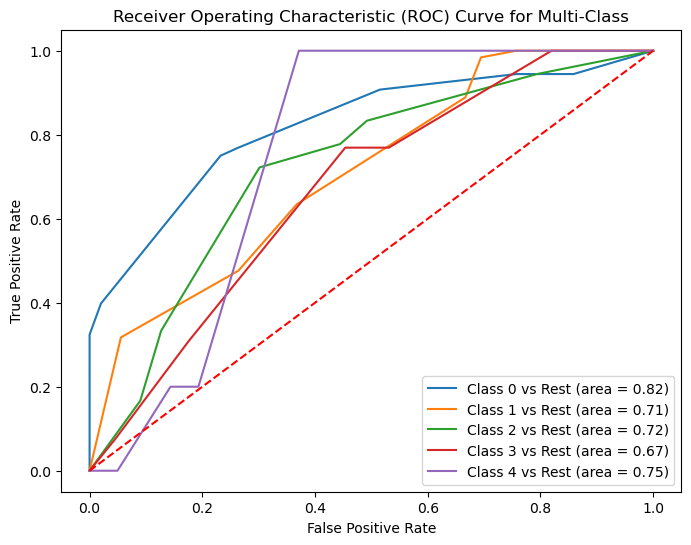

In [88]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Binarize the output labels for each class (One-vs-Rest)
y_test_bin = label_binarize(final_y_val_2, classes=[0, 1, 2, 3, 4])  # Adjust classes to your specific classes
n_classes = y_test_bin.shape[1]  # Number of classes

# Initialize dictionaries to store false positive rate and true positive rate
fpr = dict()
tpr = dict()

# Calculate ROC curve for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model_2.predict_proba(final_X_val_2)[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))  # Set figure size
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} vs Rest (area = {roc_auc_score(y_test_bin[:, i], model_2.predict_proba(final_X_val_2)[:, i]):.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plotting the diagonal line
plt.xlabel('False Positive Rate')  # Label for x-axis
plt.ylabel('True Positive Rate')   # Label for y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')  # Title of the plot
plt.legend(loc='lower right')  # Position of the legend
plt.show()  # Display the plot

### 5. Hyperparameter Tuning:

#### Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [89]:
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Criterion for measuring the quality of a split
}

In [90]:
# Initialize the Decision Tree classifier
# Create a DecisionTreeClassifier object with a fixed random state for reproducibility
dt_classifier = DecisionTreeClassifier(random_state=107)

In [91]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_classifier,  # The Decision Tree classifier object
    param_grid=param_grid,    # The parameter grid to search
    cv=5,                     # Number of cross-validation folds
    scoring='accuracy',       # Performance metric to evaluate
    n_jobs=-1,                # Use all available CPUs
    verbose=2                 # Verbosity level to get detailed logs
)

In [92]:
# Fit the model
# Train the model using the grid search
grid_search.fit(final_X_train_2, final_y_train_2)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=107),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [93]:
# Best hyperparameters
# Display the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [94]:
# Initialize and train the Decision Tree classifier with the best hyperparameters found
model_3 = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=4, min_samples_split=2)  # Initialize the model with best parameters
model_3 = model_3.fit(final_X_train_2, final_y_train_2)  # Fit the model to the training data
model_3  # Display the trained model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [95]:
# Predict on the training set using the newly trained model
y_train_preds_3 = model_3.predict(final_X_train_2)  # Generate predictions for the training set
y_train_preds_3  # Display the predictions

array([1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 0, 1, 0, 1, 3, 1, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [96]:
# Predict on the validation set using the newly trained model
y_val_preds_3 = model_3.predict(final_X_val_2)  # Generate predictions for the validation set
y_val_preds_3  # Display the predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3,
       3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 3, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [97]:
# Compute the confusion matrix for the training set predictions of the new model
model_3_train_cm = confusion_matrix(y_train_preds_3, final_y_train_2)  # Calculate confusion matrix
model_3_train_cm  # Display the confusion matrix

array([[227,  59,  11,  15,   4],
       [ 21,  63,  25,  17,   5],
       [  0,   0,   0,   0,   0],
       [  5,   6,   4,  12,   2],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [98]:
# Compute the confusion matrix for the validation set predictions of the new model
model_3_val_cm = confusion_matrix(y_val_preds_3, final_y_val_2)  # Calculate confusion matrix
model_3_val_cm  # Display the confusion matrix

array([[98, 29, 11,  7,  4],
       [10, 28,  4,  5,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  6,  3,  1,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)

In [99]:
# Generate the classification report for the training set predictions of the third model
model_3_train_report = classification_report(y_train_preds_3, final_y_train_2)  # Create classification report
print(model_3_train_report)  # Print the classification report

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       316
           1       0.49      0.48      0.49       131
           2       0.00      0.00      0.00         0
           3       0.27      0.41      0.33        29
           4       0.00      0.00      0.00         0

    accuracy                           0.63       476
   macro avg       0.33      0.32      0.32       476
weighted avg       0.75      0.63      0.68       476



In [100]:
# Generate the classification report for the validation set predictions of the third model
model_3_val_report = classification_report(y_val_preds_3, final_y_val_2)  # Create classification report
print(model_3_val_report)  # Print the classification report

              precision    recall  f1-score   support

           0       0.91      0.66      0.76       149
           1       0.44      0.58      0.50        48
           2       0.00      0.00      0.00         0
           3       0.08      0.10      0.09        10
           4       0.00      0.00      0.00         0

    accuracy                           0.61       207
   macro avg       0.29      0.27      0.27       207
weighted avg       0.76      0.61      0.67       207



In [101]:
# Calculate the accuracy score for the training set predictions of the third model
model_3_train_accuracy = accuracy_score(y_train_preds_3, final_y_train_2)  # Compute accuracy
model_3_train_accuracy  # Display the accuracy score

0.634453781512605

In [102]:
# Calculate the accuracy score for the validation set predictions of the third model
model_3_val_accuracy = accuracy_score(y_val_preds_3, final_y_val_2)  # Compute accuracy

# Display the accuracy score for the validation set
model_3_val_accuracy

0.6135265700483091

In [103]:
# Calculate the precision score for the training set predictions of the third model
model_3_train_precision = precision_score(y_train_preds_3, final_y_train_2, average="micro")  # Compute precision with micro averaging

# Display the precision score for the training set
model_3_train_precision

0.634453781512605

In [104]:
# Calculate the precision score for the validation set predictions of the third model
model_3_val_precision = precision_score(y_val_preds_3, final_y_val_2, average="micro")  # Compute precision with micro averaging

# Display the precision score for the validation set
model_3_val_precision


0.6135265700483091

In [105]:
# Calculate the recall score for the training set predictions of the third model
model_3_train_recall = recall_score(y_train_preds_3, final_y_train_2, average="micro")  # Compute recall with micro averaging

# Display the recall score for the training set
model_3_train_recall

0.634453781512605

In [106]:
# Calculate the recall score for the validation set predictions of the third model
model_3_val_recall = recall_score(y_val_preds_3, final_y_val_2, average="micro")  # Compute recall with micro averaging

# Display the recall score for the validation set
model_3_val_recall

0.6135265700483091

In [107]:
# One-vs-rest (ovr) approach
model_3_train_roc_auc_ovr = roc_auc_score(final_y_train_2, model_3.predict_proba(final_X_train_2), multi_class='ovr')

# One-vs-one (ovo) approach
#model_3_train_roc_auc_ovo = roc_auc_score(final_y_train_2, model_3.predict_proba(final_X_train_2), multi_class='ovo')

print(model_3_train_roc_auc_ovr)
#print(model_3_train_roc_auc_ovo)

0.7836734956324921


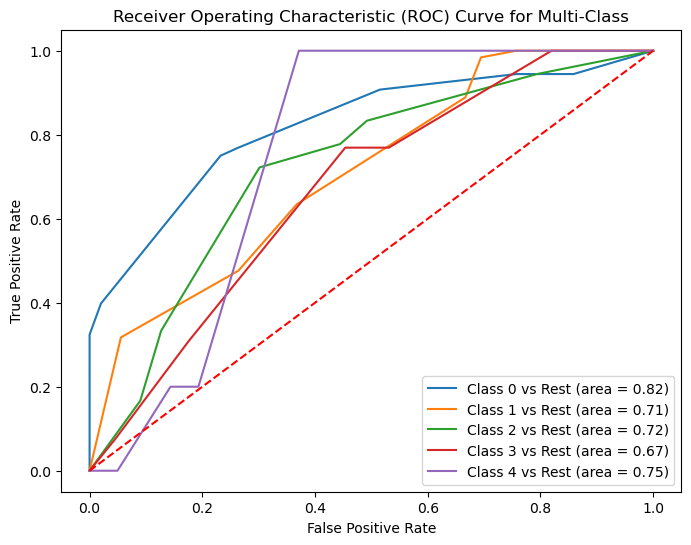

In [108]:
# Binarize the output labels for each class (One-vs-Rest)
y_test_bin = label_binarize(final_y_val_2, classes=[0, 1, 2, 3, 4])  # Adjust classes to your specific classes
n_classes = y_test_bin.shape[1]  # Determine the number of classes

# Initialize dictionaries to store False Positive Rate (FPR) and True Positive Rate (TPR) for each class
fpr = dict()  # Dictionary for FPR values
tpr = dict()  # Dictionary for TPR values

# Calculate ROC curve for each class
for i in range(n_classes):  # Loop over each class
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model_3.predict_proba(final_X_val_2)[:, i])  # Compute FPR and TPR

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))  # Set figure size for the plot
for i in range(n_classes):  # Loop over each class to plot their ROC curve
    plt.plot(fpr[i], tpr[i], label=f'Class {i} vs Rest (area = {roc_auc_score(y_test_bin[:, i], model_3.predict_proba(final_X_val_2)[:, i]):.2f})')  # Plot ROC curve

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plot the diagonal line for random guessing
plt.xlabel('False Positive Rate')  # Label for the X-axis
plt.ylabel('True Positive Rate')  # Label for the Y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')  # Title of the plot
plt.legend(loc='lower right')  # Place the legend in the lower-right corner
plt.show()  # Display the plot

In [109]:
# Get the column names (index) of the DataFrame `final_X_train_2`
index = final_X_train_2.columns

# Display the column names
index

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex_Male',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [110]:
# Calculate feature importances from the trained model
feature_imp = pd.Series(model_3.feature_importances_, index=index)

# Sort the feature importances in descending order
feature_imp = feature_imp.sort_values(ascending=False)

# Display the sorted feature importances
feature_imp

exang_True                  0.568350
age                         0.191813
thalch                      0.119937
sex_Male                    0.061825
cp_atypical angina          0.058075
restecg_normal              0.000000
thal_normal                 0.000000
slope_upsloping             0.000000
slope_flat                  0.000000
restecg_st-t abnormality    0.000000
cp_typical angina           0.000000
fbs_True                    0.000000
trestbps                    0.000000
cp_non-anginal              0.000000
oldpeak                     0.000000
chol                        0.000000
thal_reversable defect      0.000000
dtype: float64

In [111]:
# Drop the least important features from the training data based on feature importance analysis
imp_X_train = final_X_train_2.drop(
    [
        "restecg_normal", "thal_normal", "slope_upsloping", "slope_flat", 
        "restecg_st-t abnormality", "cp_typical angina", "fbs_True", 
        "trestbps", "cp_non-anginal", "oldpeak", "chol", 
        "thal_reversable defect"
    ], 
    axis=1
)

# Display the modified training data with the most important features
imp_X_train

age    thalch  sex_Male  cp_atypical angina  exang_True
0   -0.068114 -0.936038         1                   0           1
1    0.690698 -2.054915         1                   0           0
2    0.257091  0.518501         0                   0           1
3   -1.585738  0.891459         1                   0           0
4   -1.585738 -0.152825         1                   0           0
5    1.774715 -0.898742         1                   0           1
6   -0.935327 -0.525784         1                   1           0
7    0.473895  0.593092         0                   1           0
8   -0.068114  0.145542         1                   0           0
9   -1.585738  0.518501         1                   0           0
10   0.148690  1.637377         1                   1           0
11   1.015903 -0.563080         1                   0           1
12  -1.368934  0.294726         1                   1           0
13   1.991518 -1.271701         1                   0           1
14  -2.019344  0.742276         1                   0           1
15   1.557912  0.555797         1                   0           1
16   0.040288 -0.674967         1                   0           1
17  -0.935327  1.450898         0                   1           0
18  -0.610122 -1.644660         1                   0           1
19  -0.610122  0.108246         0                   0           0
20   1.015903 -0.003641         0                   0           1
21   0.040288 -1.010630         1                   0           1
22   0.365493 -1.346293         1                   0           0
23   0.257091  0.145542         1                   0           0
24  -1.802541  1.189826         1                   0           0
25  -0.826926  0.406613         1                   0           0
26  -0.393319 -0.302008         1                   0           0
27  -2.019344 -2.054915         1                   0           0
28  -0.826926  0.145542         1                   0           0
29  -0.176516  0.070950         1                   1           1
30   1.341108 -1.383589         1                   0           1
31  -2.019344 -0.227417         1                   0           1
32  -1.477336  1.339010         1                   1           0
33  -0.284917 -1.308997         1                   0           0
34  -1.260532  1.376306         0                   0           0
35   0.799100 -1.234405         1                   0           0
36  -1.477336  1.152531         1                   0           0
37  -1.260532  0.518501         1                   0           0
38   1.774715 -0.413896         1                   0           1
39   1.015903  0.145542         1                   0           1
40  -0.068114 -0.749559         1                   0           1
41  -0.176516  0.406613         1                   0           0
42   0.148690 -2.577057         1                   0           0
43  -1.368934  0.518501         0                   1           0
44  -0.176516 -1.570068         1                   0           1
45  -1.043729 -0.040937         1                   1           0
46  -1.585738  0.145542         1                   0           0
47  -0.393319 -0.749559         1                   1           0
48   0.473895 -0.674967         1                   0           1
49   0.148690 -1.271701         1                   0           0
50  -0.068114 -0.302008         1                   0           1
51   0.148690 -0.078233         1                   0           0
52   0.907501 -0.749559         0                   0           0
53   0.365493  0.854164         0                   0           0
54  -0.610122 -0.973334         1                   0           0
55  -0.176516  1.786560         1                   1           0
56   0.040288  0.667684         1                   1           0
57  -0.284917 -0.488488         1                   0           0
58   0.907501 -1.607364         1                   1           1
59   1.015903  1.339010         0                 

In [112]:
# Drop the least important features from the validation data based on feature importance analysis
imp_X_val = final_X_val_2.drop(
    [
        "restecg_normal", "thal_normal", "slope_upsloping", "slope_flat", 
        "restecg_st-t abnormality", "cp_typical angina", "fbs_True", 
        "trestbps", "cp_non-anginal", "oldpeak", "chol", 
        "thal_reversable defect"
    ], 
    axis=1
)

# Display the modified validation data with the most important features
imp_X_val

age    thalch  sex_Male  cp_atypical angina  exang_True
0   -1.694139  1.376306         1                   0           0
1    1.666313 -2.017619         1                   0           0
2   -1.477336  1.562785         1                   0           1
3   -0.501721  1.040643         0                   1           0
4   -1.043729  1.600081         1                   0           1
5    0.473895 -1.644660         1                   0           0
6   -0.610122  0.518501         1                   0           1
7    1.232706 -0.674967         1                   0           0
8   -0.718524 -1.420885         0                   0           1
9    0.365493 -0.451192         1                   0           0
10  -2.127746  1.637377         1                   0           0
11   0.473895 -0.190121         1                   0           1
12   0.582296  0.667684         1                   0           1
13  -1.368934  1.003347         0                   1           0
14  -0.284917 -0.525784         1                   0           0
15   0.582296  0.220134         1                   0           1
16  -0.610122 -0.413896         0                   0           0
17  -0.176516  1.227122         0                   0           0
18   0.148690 -0.302008         1                   0           1
19  -0.393319  1.003347         1                   0           0
20   0.365493  0.145542         1                   1           0
21   1.449510 -0.413896         1                   0           0
22  -1.477336  1.674673         1                   0           0
23  -1.260532  1.264418         1                   0           0
24  -2.127746  2.084927         0                   1           0
25   0.582296  0.928755         1                   0           0
26  -0.501721  1.301714         1                   1           0
27  -0.826926  0.518501         1                   0           0
28  -1.477336  0.518501         1                   1           0
29  -1.694139  1.115235         1                   0           0
30   0.257091 -0.302008         1                   0           1
31   0.473895  0.145542         1                   0           1
32  -1.585738  0.593092         0                   0           0
33  -1.152131  0.667684         0                   1           0
34  -1.152131 -0.600375         1                   0           1
35   1.232706  0.555797         0                   0           0
36   0.148690  0.704980         1                   1           0
37  -1.368934  1.189826         0                   1           0
38  -0.068114 -0.786855         0                   0           0
39  -1.260532 -0.003641         1                   1           0
40  -0.718524  0.332021         1                   0           1
41  -0.826926  0.294726         1                   0           0
42   1.124305  0.667684         0                   0           1
43  -1.368934  1.600081         1                   0           0
44   1.232706  1.413602         1                   0           0
45  -1.694139 -0.227417         1                   0           0
46   1.449510  0.518501         1                   0           0
47   1.232706 -0.339304         1                   0           0
48   0.907501 -1.458181         1                   0           1
49  -2.019344  1.637377         1                   1           0
50   0.148690 -1.719252         1                   0           0
51   0.148690  0.518501         1                   1           0
52   1.341108 -1.570068         1                   0           1
53  -0.826926 -0.749559         1                   0           0
54  -1.585738  0.145542         1                   0           0
55  -0.718524  0.593092         1                   0           0
56   0.257091 -1.159814         1                   0           1
57   0.148690 -1.495476         1                   0           1
58   0.582296  0.854164         1                   0           0
59   0.365493 -0.898742         1                 

In [113]:
# Initialize and fit a Decision Tree classifier with the specified hyperparameters, using only the most important features
model_4 = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=4, min_samples_split=2)
model_4 = model_4.fit(imp_X_train, final_y_train_2)

# Display the fitted model
model_4

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [114]:
# Predicting the target variable for the training set using the model trained on important features
y_train_preds_4 = model_4.predict(imp_X_train)

# Display the predictions for the training set
y_train_preds_4

array([1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 0, 1, 0, 1, 3, 1, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [115]:
# Predicting the target variable for the validation set using the model trained on important features
y_val_preds_4 = model_4.predict(imp_X_val)

# Display the predictions for the validation set
y_val_preds_4

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3,
       3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 3, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [116]:
# Compute the confusion matrix for the training set predictions
model_4_train_cm = confusion_matrix(y_train_preds_4, final_y_train_2)

# Display the confusion matrix for the training set
model_4_train_cm

array([[227,  59,  11,  15,   4],
       [ 21,  63,  25,  17,   5],
       [  0,   0,   0,   0,   0],
       [  5,   6,   4,  12,   2],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [117]:
# Compute the confusion matrix for the validation set predictions
model_4_val_cm = confusion_matrix(y_val_preds_4, final_y_val_2)

# Display the confusion matrix for the validation set
model_4_val_cm

array([[98, 29, 11,  7,  4],
       [10, 28,  4,  5,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  6,  3,  1,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)

In [118]:
# Generate and print the classification report for the training set predictions of the fourth model
model_4_train_report = classification_report(y_train_preds_4, final_y_train_2)
print(model_4_train_report)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       316
           1       0.49      0.48      0.49       131
           2       0.00      0.00      0.00         0
           3       0.27      0.41      0.33        29
           4       0.00      0.00      0.00         0

    accuracy                           0.63       476
   macro avg       0.33      0.32      0.32       476
weighted avg       0.75      0.63      0.68       476



In [119]:
# Generate and print the classification report for the validation set predictions of the fourth model
model_4_val_report = classification_report(y_val_preds_4, final_y_val_2)
print(model_4_val_report)

              precision    recall  f1-score   support

           0       0.91      0.66      0.76       149
           1       0.44      0.58      0.50        48
           2       0.00      0.00      0.00         0
           3       0.08      0.10      0.09        10
           4       0.00      0.00      0.00         0

    accuracy                           0.61       207
   macro avg       0.29      0.27      0.27       207
weighted avg       0.76      0.61      0.67       207



In [120]:
# Calculate and display the accuracy score for the training set predictions of the fourth model
model_4_train_accuracy = accuracy_score(y_train_preds_4, final_y_train_2)
model_4_train_accuracy

0.634453781512605

In [121]:
# Calculate and display the accuracy score for the validation set predictions of the fourth model
model_4_val_accuracy = accuracy_score(y_val_preds_4, final_y_val_2)
model_4_val_accuracy

0.6135265700483091

### 6. Model Evaluation and Analysis:

#### Analyse the performance of the Decision Tree model using the evaluation metrics obtained.


#### Visualize the decision tree structure to understand the rules learned by the model and identify important features

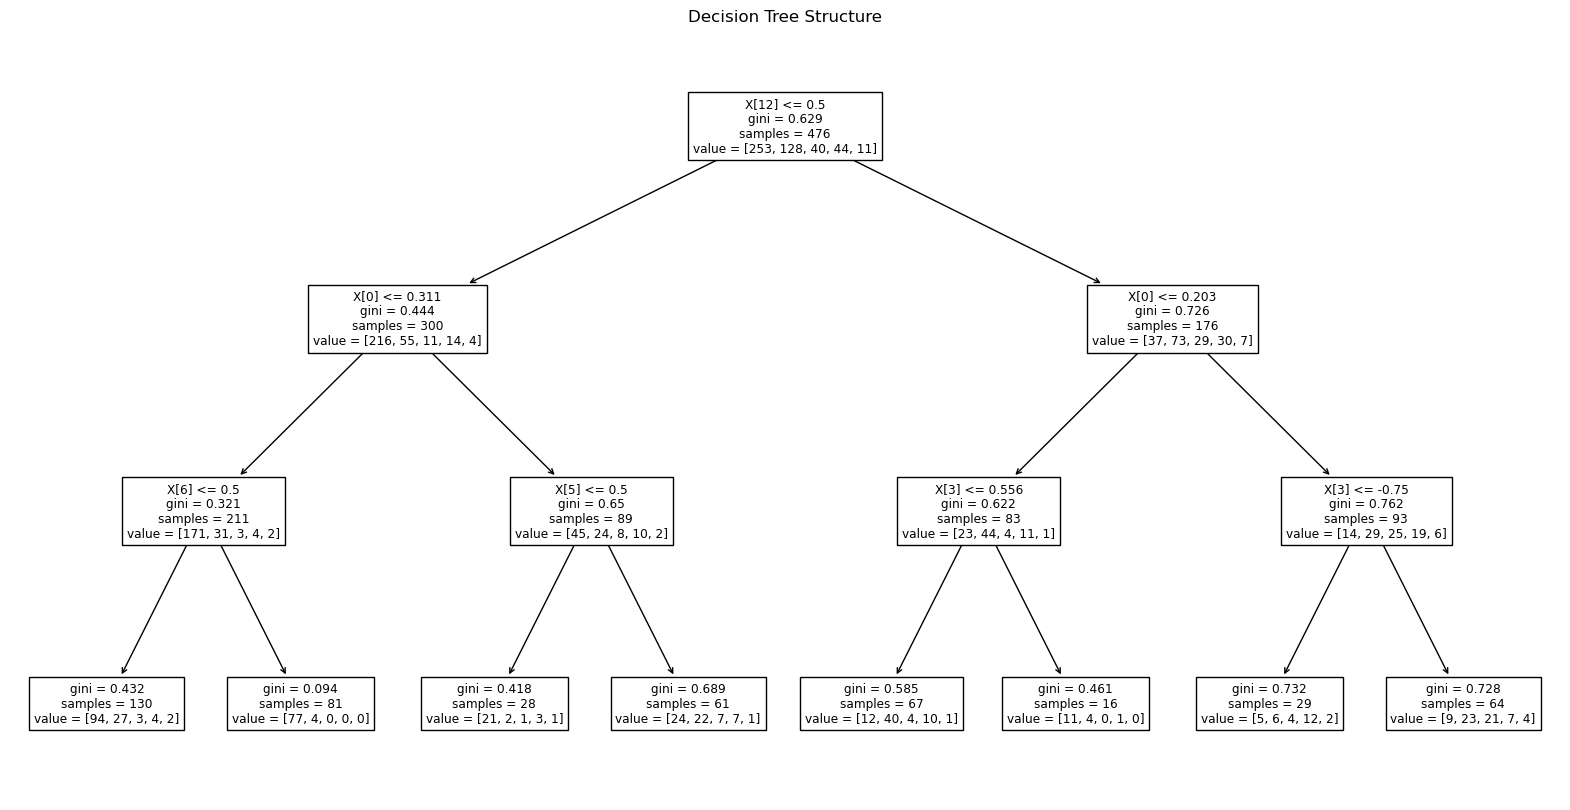

In [122]:
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the figure size
tree.plot_tree(model_3)  # Plot the decision tree
plt.title("Decision Tree Structure")  # Set the title of the plot
plt.show()  # Display the plot

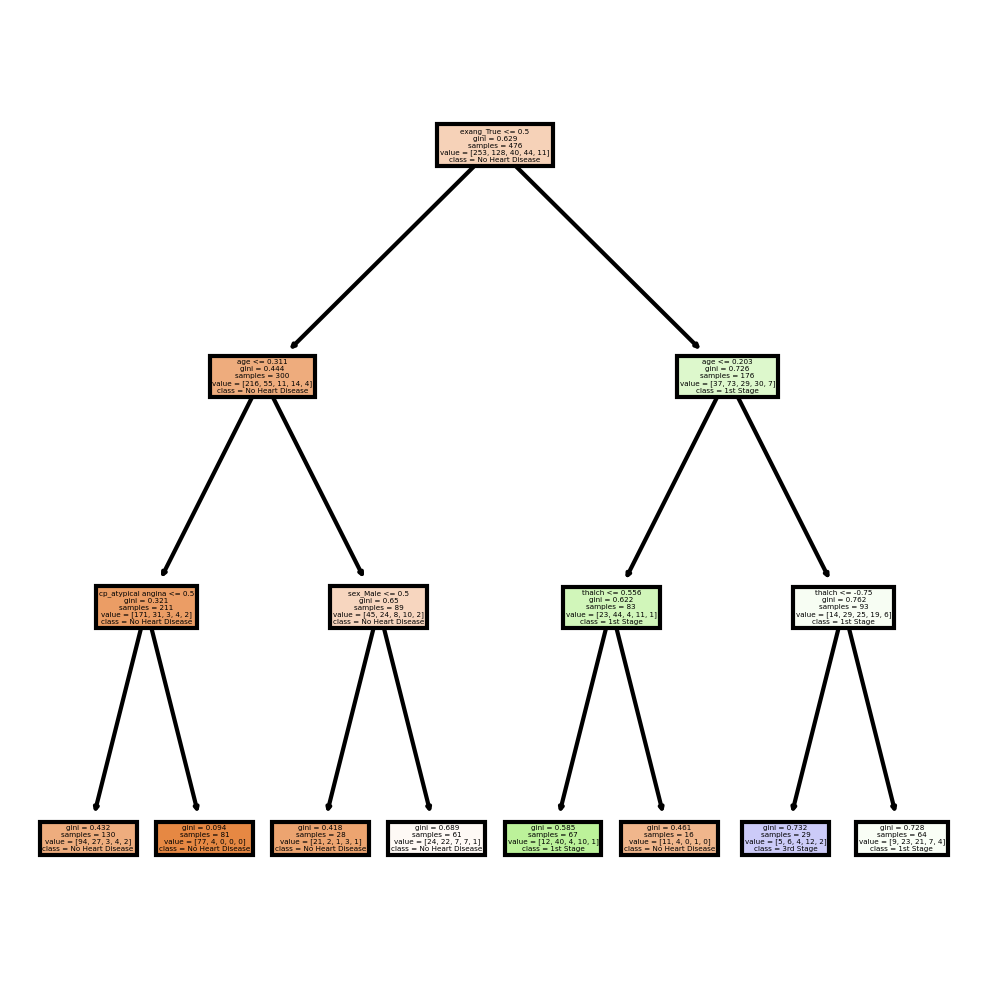

In [123]:
fn = ['age', 'thalch', 'sex_Male', 'cp_atypical angina', 'exang_True']  # Feature names
cn = ["No Heart Disease", "1st Stage", "2nd Stage", "3rd Stage", "4th Stage"]  # Class names

# Create a figure and axes for plotting
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

# Plot the decision tree with feature and class names
tree.plot_tree(model_4,
               feature_names=fn,  # Set feature names
               class_names=cn,  # Set class names
               filled=True)  # Fill nodes with colors

plt.show()  # Display the plot